# **Penguin Species**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline

from scipy.cluster import hierarchy

Let's first load the data and see what we've got:

In [2]:
data = pd.read_csv("penguins.csv")

In [3]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,MALE
1,NaN,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE
328,NaN,NaN,215.0,4850.0,FEMALE
329,50.4,15.7,222.0,5750.0,MALE
330,45.2,14.8,212.0,5200.0,FEMALE


The dataset is pretty small. Let's do some exploratory analysis, beginning with each feature separately:

In [4]:
data["culmen_length_mm"].isna().value_counts()

culmen_length_mm
False    328
True       4
Name: count, dtype: int64

We can see, that there are only 4 missing values, now let's see what we can do with them:

In [5]:
data["culmen_length_mm"].describe()

count    328.000000
mean      44.006402
std        5.466103
min       32.100000
25%       39.450000
50%       44.700000
75%       48.625000
max       59.600000
Name: culmen_length_mm, dtype: float64

The mean and the median are really close to each other, which means, that the values most likely resemble a normal distrinution. Let's plot it to be sure:

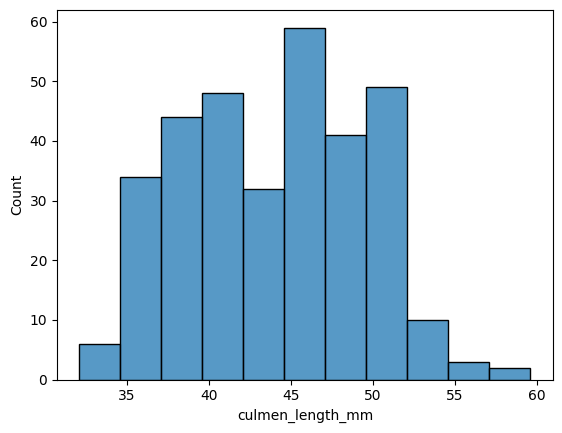

In [6]:
sns.histplot(data=data["culmen_length_mm"], bins="fd")
plt.show()

Now that we've plotted it, we can see, that it's closer to a multimodal distrinution.

Still, the best thing to do with these 4 missing values is to replace them with the median:

In [7]:
data.loc[data["culmen_length_mm"].isna(), "culmen_length_mm"] = data["culmen_length_mm"].median()

Now let's create a boxplot to look for outliars, although it looks unlikely for there to be many of them:

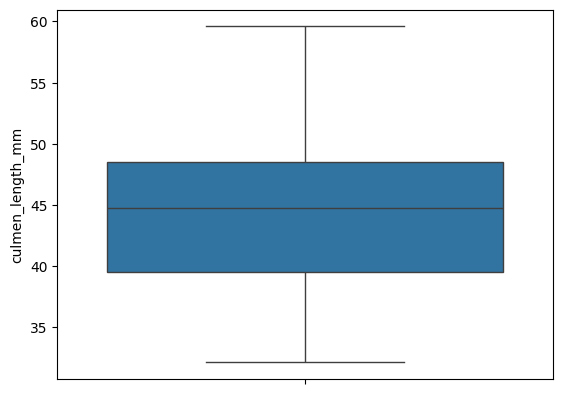

In [8]:
sns.boxplot(data=data["culmen_length_mm"])
plt.show()

Well, apparently there are no values outside of the IQR.

Now let's do the same for the culmen depth:

In [9]:
data["culmen_depth_mm"].isna().value_counts()

culmen_depth_mm
False    329
True       3
Name: count, dtype: int64

In [10]:
data["culmen_depth_mm"].describe()

count    329.000000
mean      17.175076
std        1.954759
min       13.100000
25%       15.700000
50%       17.300000
75%       18.700000
max       21.500000
Name: culmen_depth_mm, dtype: float64

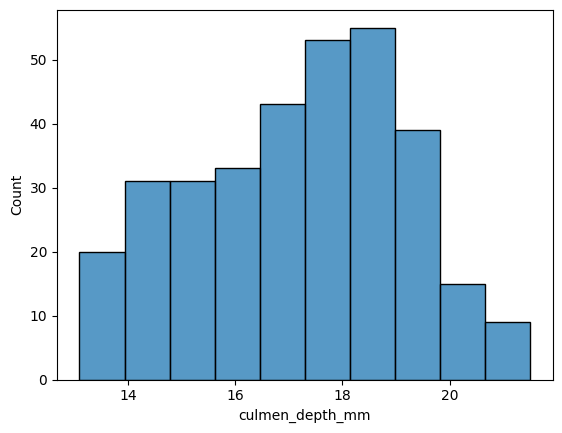

In [11]:
sns.histplot(data=data["culmen_depth_mm"], bins="fd")
plt.show()

This time, the distribution isn't multimodal. So it's even better to impute the missing values with the median.

In [12]:
data.loc[data["culmen_depth_mm"].isna(), "culmen_depth_mm"] = data["culmen_depth_mm"].median()

Now at last, let's again draw a boxplot:

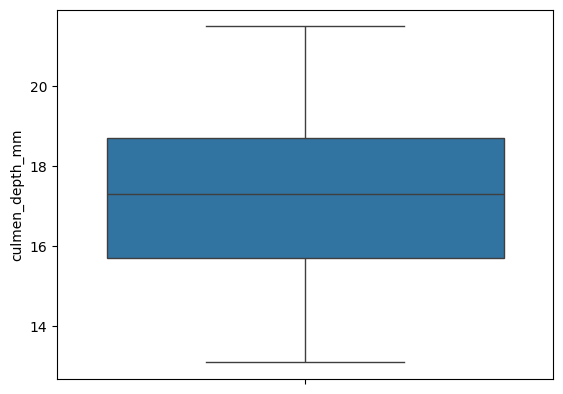

In [13]:
sns.boxplot(data=data["culmen_depth_mm"])
plt.show()

Again, no apparent outliars. Let's now explore the flipper length:

In [14]:
data["flipper_length_mm"].isna().value_counts()

flipper_length_mm
False    327
True       5
Name: count, dtype: int64

In [15]:
data["flipper_length_mm"].describe()

count    327.000000
mean     201.195719
std       14.007390
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

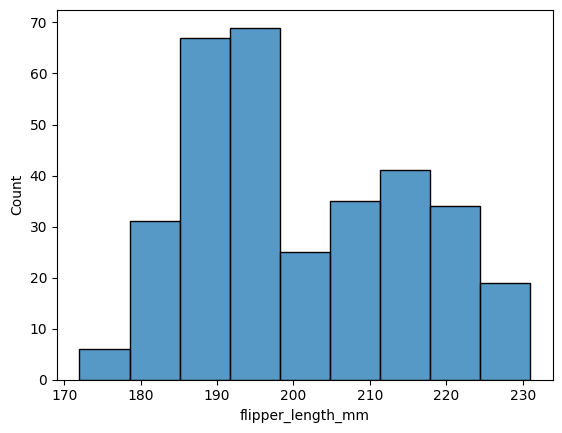

In [16]:
sns.histplot(data=data["flipper_length_mm"], bins="fd")
plt.show()

Again, we can observe a multimodal distribution. Let's again impute the missing values with the median:

In [17]:
data.loc[data["flipper_length_mm"].isna(), "flipper_length_mm"] = data["flipper_length_mm"].median()

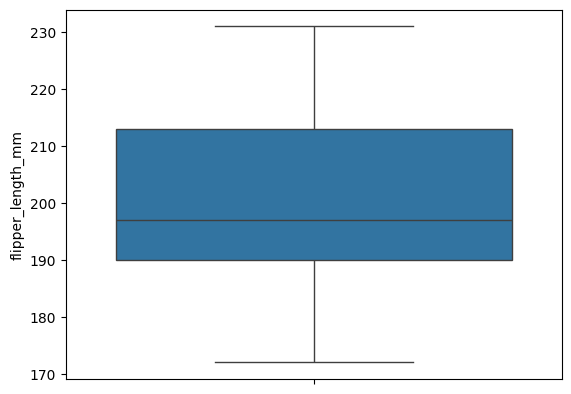

In [18]:
sns.boxplot(data=data["flipper_length_mm"])
plt.show()

Again, no apparent outliars. Time for the body mass:

In [19]:
data["body_mass_g"].isna().value_counts()

body_mass_g
False    332
Name: count, dtype: int64

There are no missing values here, which is great!

In [20]:
data["body_mass_g"].describe()

count     332.000000
mean     4206.475904
std       806.361278
min      2700.000000
25%      3550.000000
50%      4025.000000
75%      4781.250000
max      6300.000000
Name: body_mass_g, dtype: float64

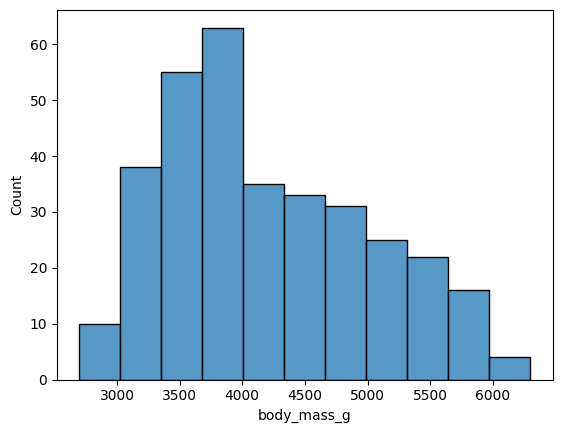

In [21]:
sns.histplot(data=data["body_mass_g"], bins="fd")
plt.show()

Here is a distribution with a bit of a right tail. Let's look at a box plot.

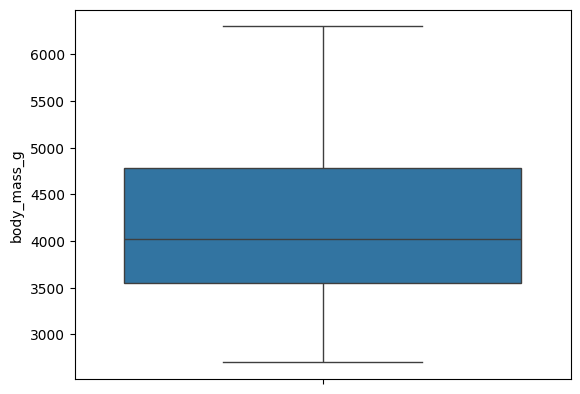

In [22]:
sns.boxplot(data=data["body_mass_g"])
plt.show()

Now let's explore the genders, starting with the missing features:

In [23]:
data["gender"].isna().value_counts()

gender
False    331
True       1
Name: count, dtype: int64

In [24]:
data[data["gender"].isna()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
324,46.2,14.1,217.0,4375.0,NaN


There isn't any adequate way to guess the gender and it's only one observation so it wouldn't be a problem to just remove it. Also, we've already explored the other features for missing values so we can safely do this:

In [25]:
data = data.dropna(axis=0)

Now it's time to draw some plots:

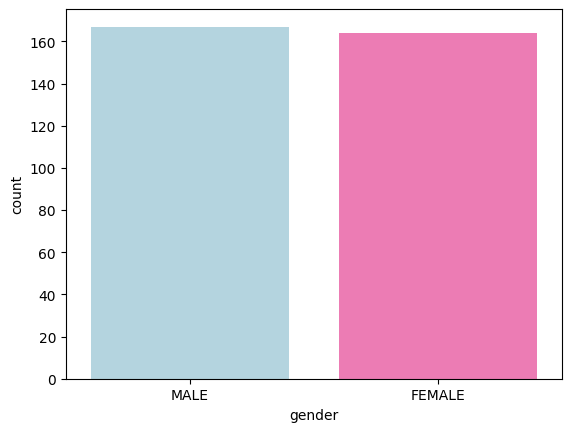

In [26]:
sns.countplot(data, x="gender", hue="gender", palette=["lightblue", "hotpink"], legend=False)
plt.show()

The scientists have done a good job of examining equally as many males as females. The data is pretty balanced.

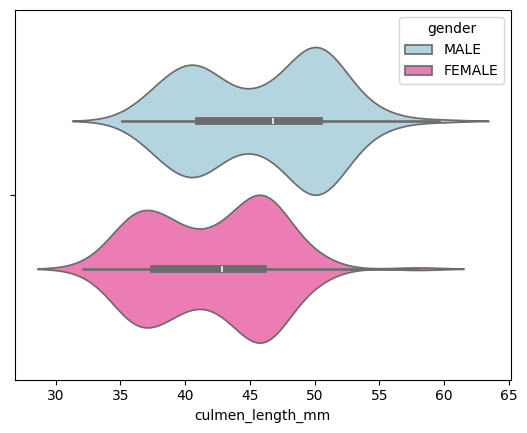

In [27]:
sns.violinplot(data, x="culmen_length_mm", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

The bimodal distribution is still apparent here. Female penguins tend to have shorter cumens than their male counterparts, but the distributions are the same.

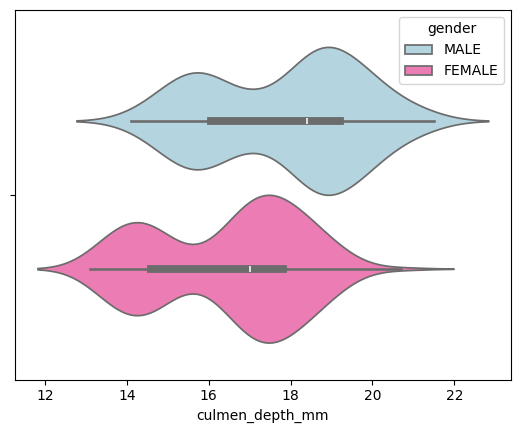

In [28]:
sns.violinplot(data, x="culmen_depth_mm", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Really strange... A bimodal distribution appeared here as well, which was not seen on the histogram.

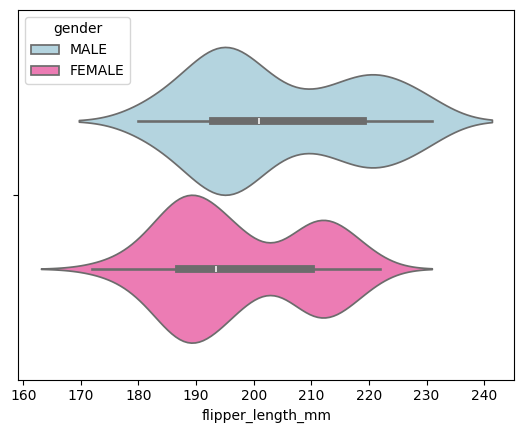

In [29]:
sns.violinplot(data, x="flipper_length_mm", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Same results here, although this time the genders are more equal. Time for the body mass at last:

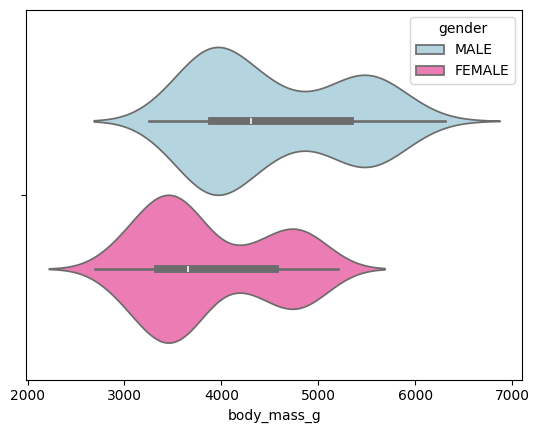

In [30]:
sns.violinplot(data, x="body_mass_g", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Here, we see the exact same results as well. Now it's time to inspect those features two by two with scatterplots:

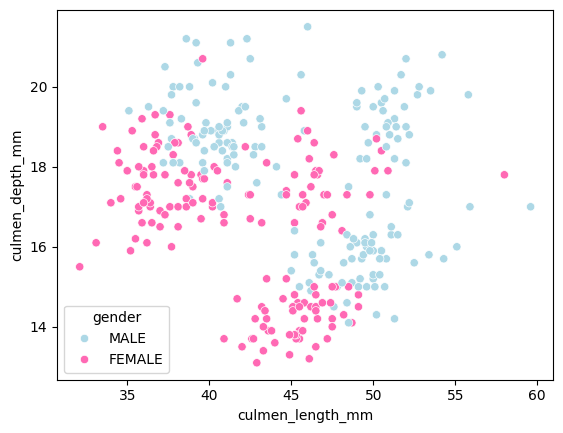

In [31]:
sns.scatterplot(data=data, x="culmen_length_mm", y="culmen_depth_mm", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Here we can see some sort of a separation into two clusters if we ignore the colours of the genders.

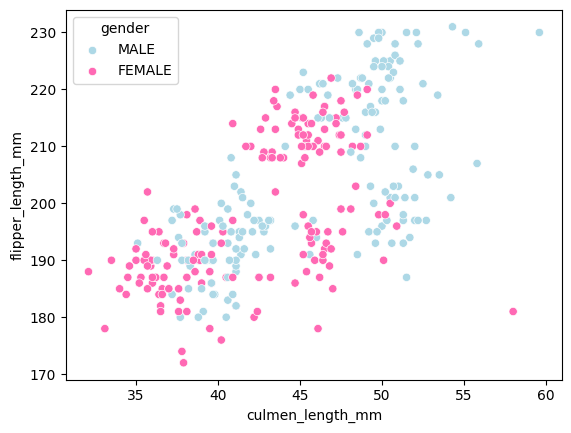

In [32]:
sns.scatterplot(data=data, x="culmen_length_mm", y="flipper_length_mm", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Again, some sort of a division and this time there may be even 3 clusters.

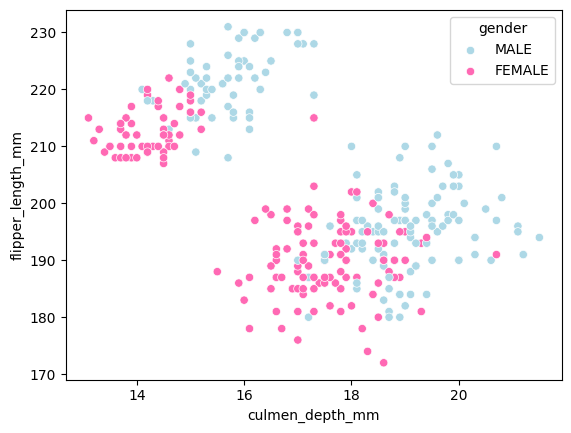

In [33]:
sns.scatterplot(data=data, x="culmen_depth_mm", y="flipper_length_mm", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Okay, this time it's very apparent. 

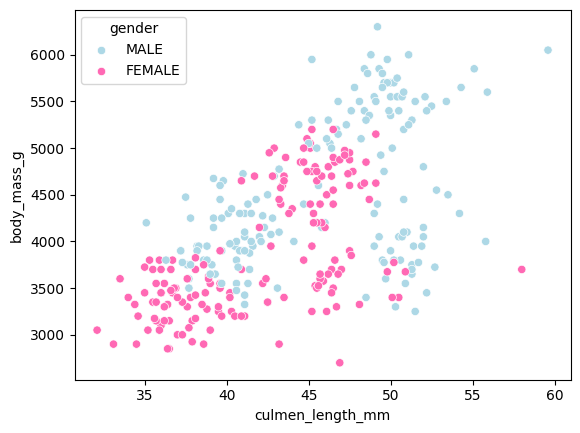

In [34]:
sns.scatterplot(data=data, x="culmen_length_mm", y="body_mass_g", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Here we see no clear separation.

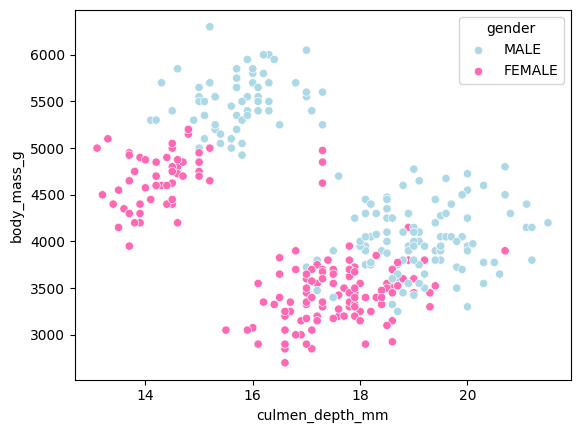

In [35]:
sns.scatterplot(data=data, x="culmen_depth_mm", y="body_mass_g", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

But here it becomes apparent again. Now for the last pair of features:

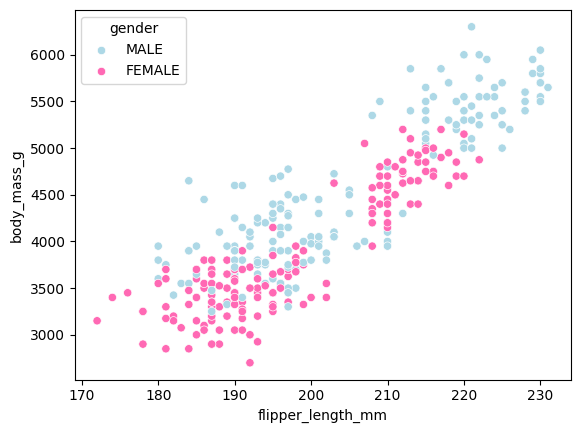

In [36]:
sns.scatterplot(data=data, x="flipper_length_mm", y="body_mass_g", hue="gender", palette=["lightblue", "hotpink"])
plt.show()

Again, they look kind of like they are separated.

Now it's time to get into the clustering part, but first we would have to prepare our data. We will begin by encoding the gender with numbers.

Let MALE = 1 and FEMALE = 0.

In [37]:
data.loc[data["gender"] == "MALE", "gender"] = 1
data.loc[data["gender"] == "FEMALE", "gender"] = 0

data.loc[:,"gender"] = data["gender"].astype(int)

In [38]:
data = data.reset_index()

Now it's time for the scaling:

In [39]:
scaler = StandardScaler()
scaler.fit(data.drop(columns=["gender"]))

scaled_data = pd.DataFrame(scaler.transform(data.drop(columns=["gender"])), columns=data.columns[:-1])
scaled_data.loc[:,"gender"] = data["gender"]

Now that we have the data prepared, let's try to figure out how many penguin species there are. The first thing we are going to do is to take a look at the inertia graph of KMeans.

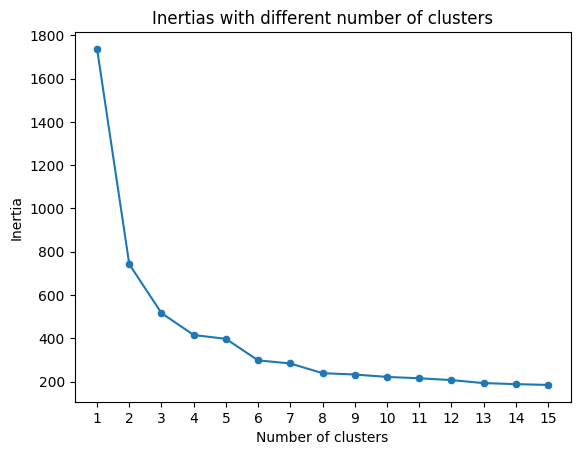

In [40]:
def plot_inertias(data, n_clusters):
    inertias = {}
    
    for k in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias[k] = kmeans.inertia_
    
    sns.lineplot(inertias)
    sns.scatterplot(inertias)
    
    plt.title("Inertias with different number of clusters")
    plt.xlabel("Number of clusters")
    plt.xticks(np.linspace(1, n_clusters, n_clusters))
    plt.ylabel("Inertia")
    
    plt.show()

plot_inertias(scaled_data, 15)

This graph makes me suspect, that there are 5 or 6 species. Let's now create a dendrogram to see how the clustering looks like:

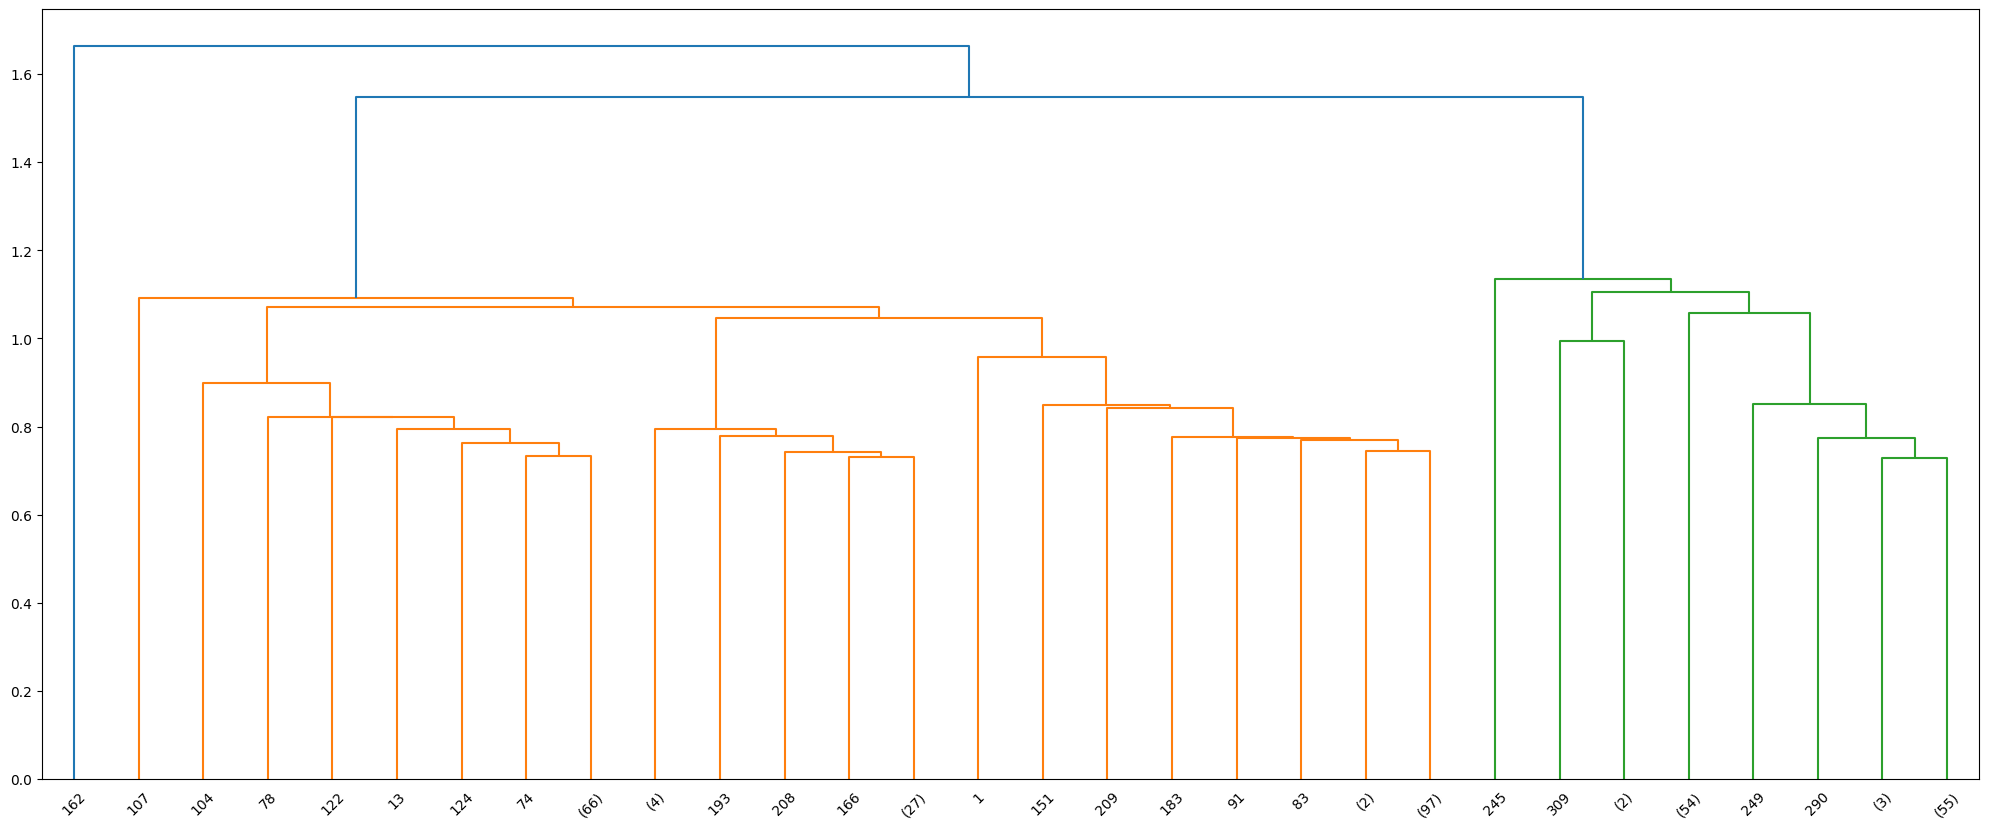

In [41]:
def plot_dendrogram(data, method):
    mergings = hierarchy.linkage(data, method=method)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))
    hierarchy.dendrogram(mergings, truncate_mode="lastp", ax=ax)
    plt.show()

plot_dendrogram(scaled_data, "single")

Well, there seems to be an outliar with the index 162. Let's look at it:

In [42]:
scaled_data.iloc[162]

index               -0.031606
culmen_length_mm     2.575737
culmen_depth_mm      0.316993
flipper_length_mm   -1.446688
body_mass_g         -0.627511
gender                      0
Name: 162, dtype: object

This one seems to have a pretty long culmen and a pretty short flipper. Maybe there aren't many penguins that way. Let's inspect this with a scatterplot on the scaled data:

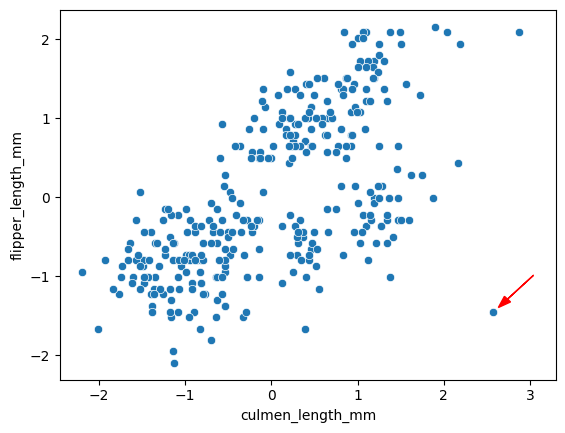

In [43]:
sns.scatterplot(data=scaled_data, x="culmen_length_mm", y="flipper_length_mm")
plt.arrow(x=3.04, y=-0.99, dx=-0.3, dy=-0.3, head_width=0.1, color="red")
plt.show()

Here it becomes really apparent. This could be a new species with no other like it in the dataset or an outliar, we can't be sure. Now let's try to draw a dendrogram using the other three linkage methods:

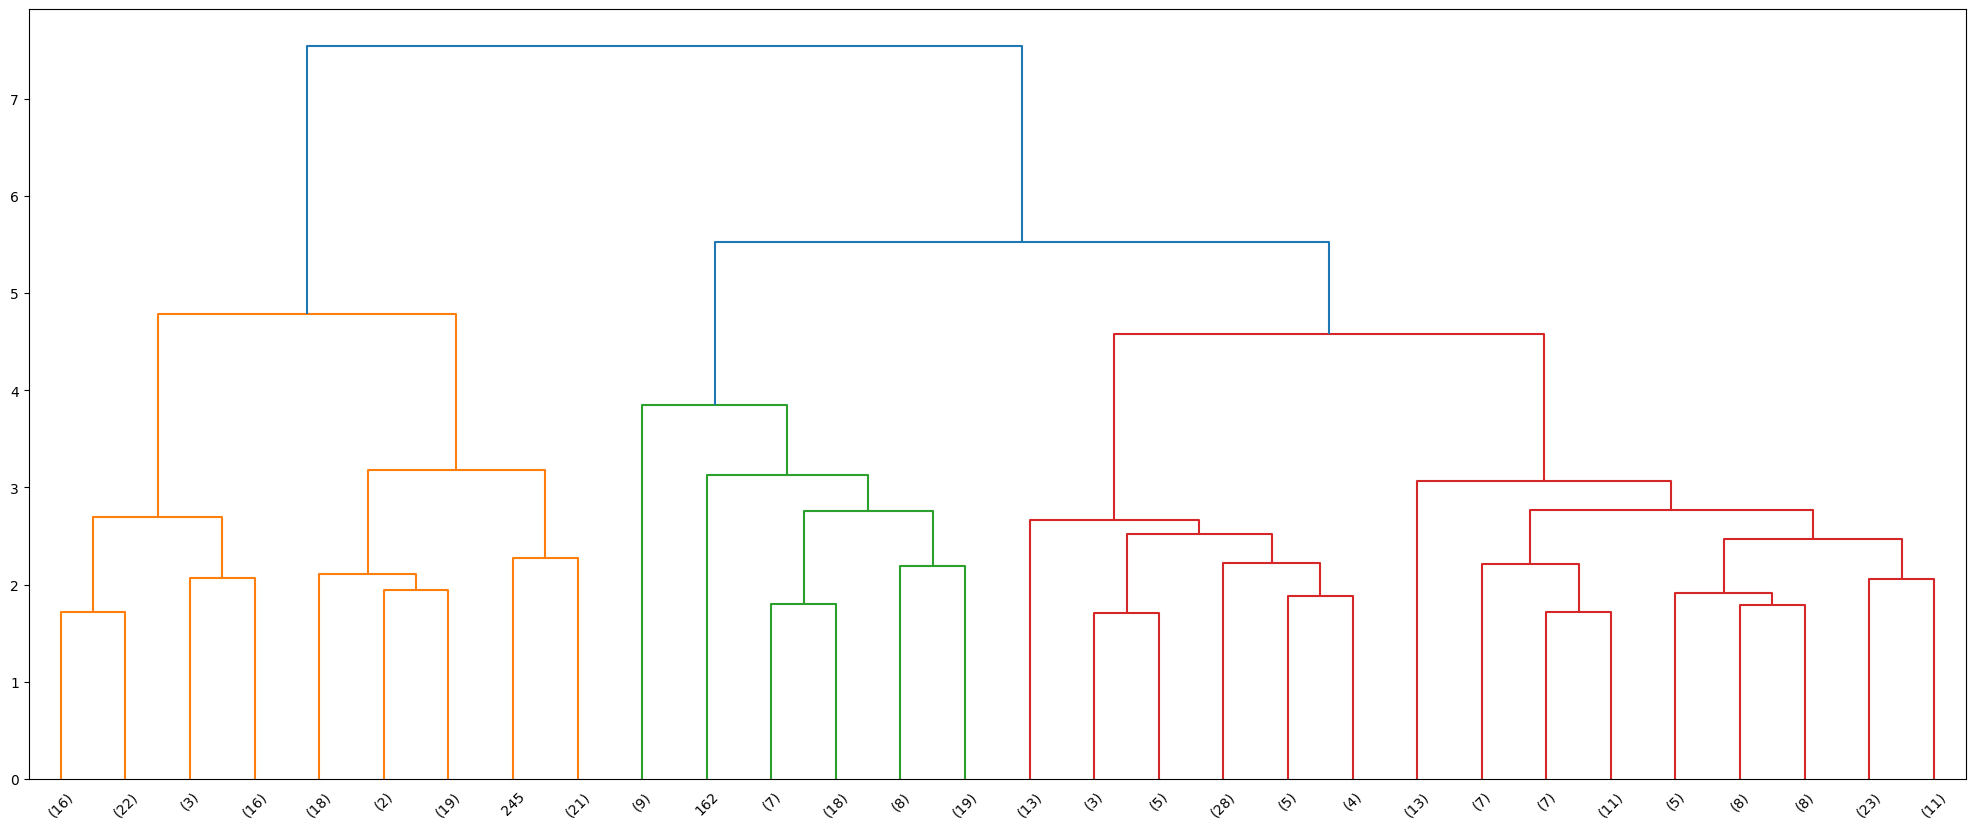

In [44]:
plot_dendrogram(scaled_data, "complete")

Here ce can see, that the interesting case of the penguin with index 162 is going into a cluster with others relatively quickly. So it all boils down to the linkage methods. Also it seems, that there are most likely 5 species here.

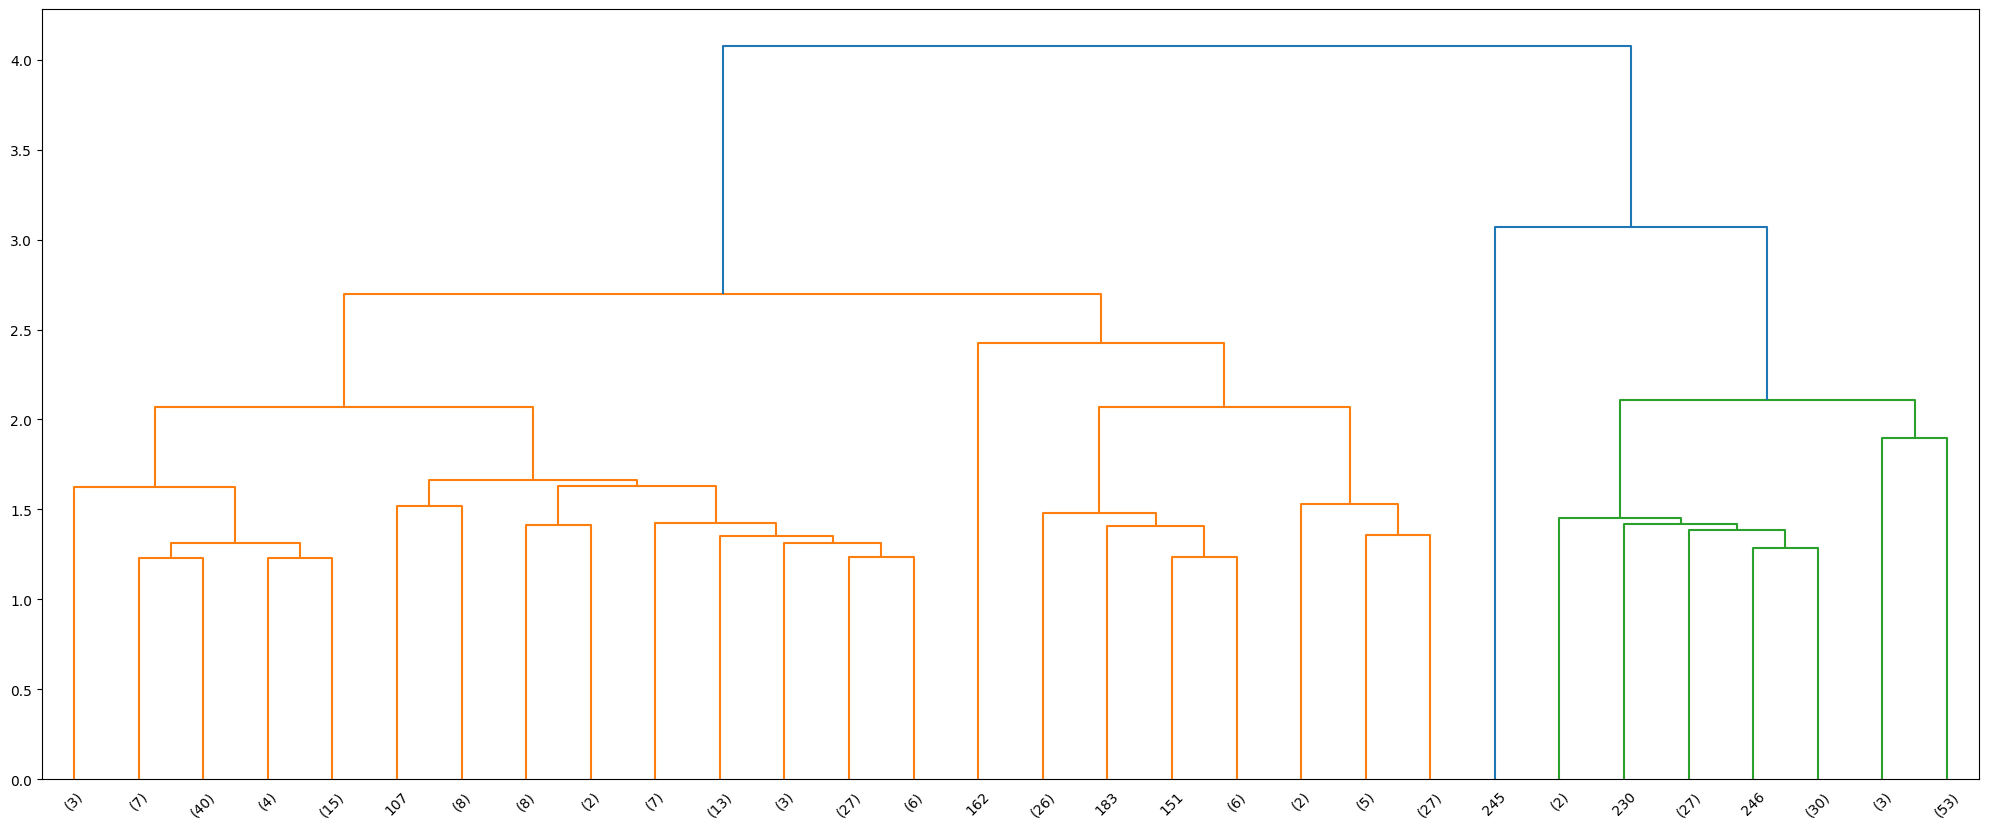

In [45]:
plot_dendrogram(scaled_data, "average")

Here the results are more conflicted. Some of the clusters are really close to each other so it can be 4 or 5.

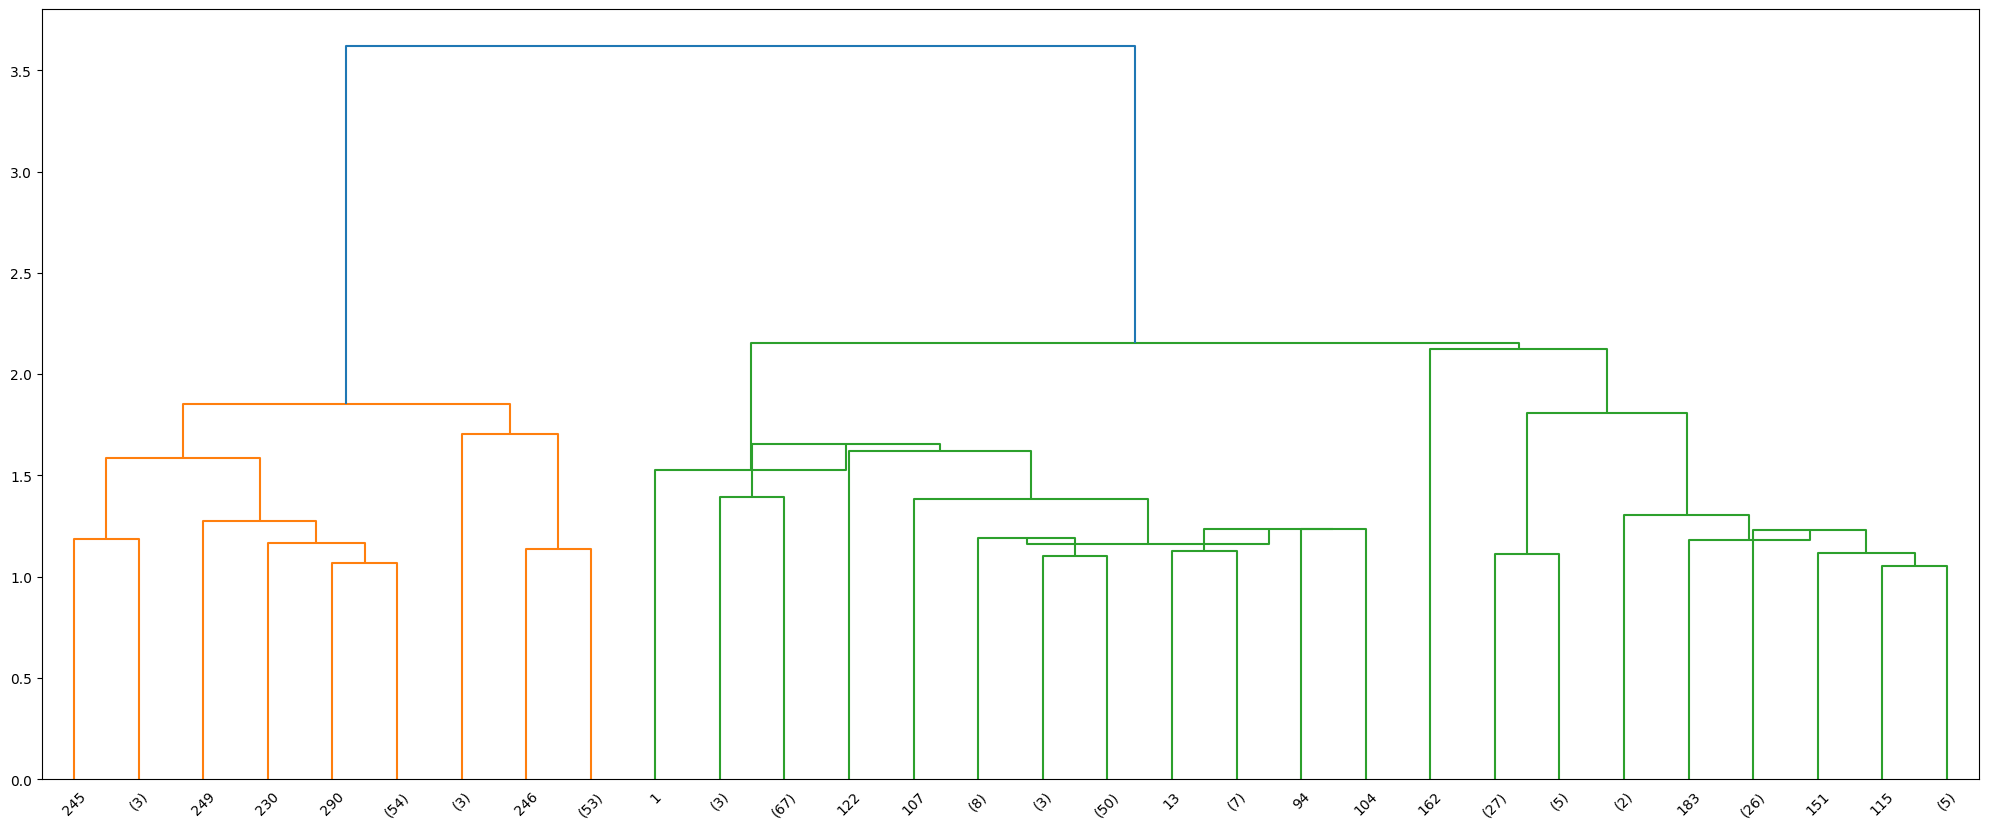

In [46]:
plot_dendrogram(scaled_data, "centroid")

Here we can see more confidently, that there are 4 species.

Every dendrogram shows conflicting results, so we can't say for sure how many species there are. Let's try another method for visualization:

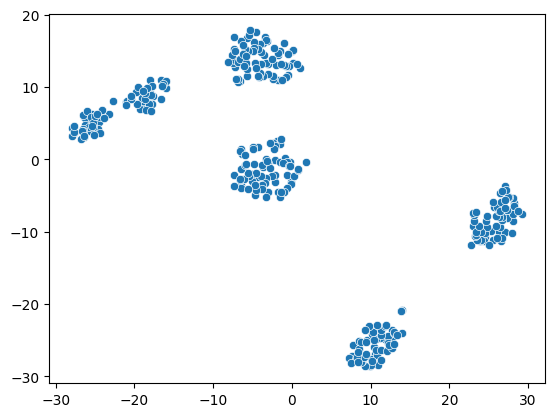

In [47]:
tsne = TSNE(learning_rate=60, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1])
plt.show()

T-SNE shows us 6 clear clusters, although the upper-left one can be treated as one.

Now let's take a look at what the PCA-compressed dataset looks like:

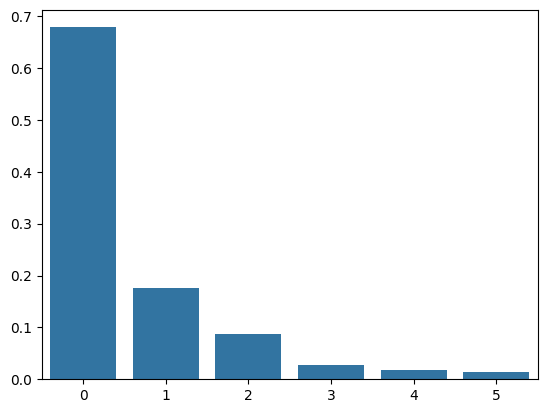

In [48]:
pca_all_features = PCA(random_state=42)
pca_all_features.fit(scaled_data)

sns.barplot(pca_all_features.explained_variance_ratio_)
plt.show()

The first 2 components make up roughly almost 90% of the data so it's okay to reduce the dimensions to 2.

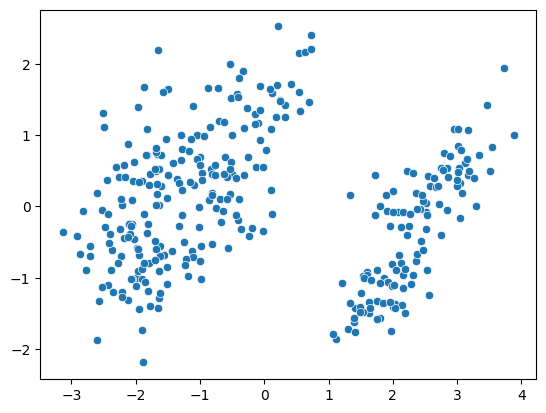

In [49]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], legend=False)
plt.show()

Well, at least on a scatterplot, we can only see 2 clusters here. Now let's look at the KMeans inertia graph again, this time using the reduced version of the data.

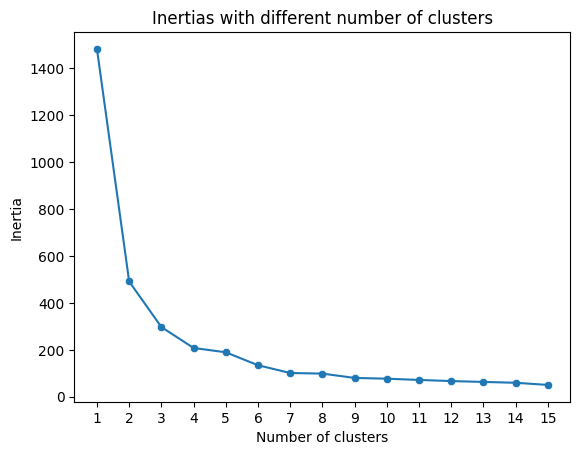

In [50]:
plot_inertias(pca_data, 15)

If we look at the previous inertia graph, we can see, that the inertia with the PCA dataset has dropped significantly, which is great news, although the curve looks even smoother with no clear "elbow" point. Now it's time to make dendrograms again.

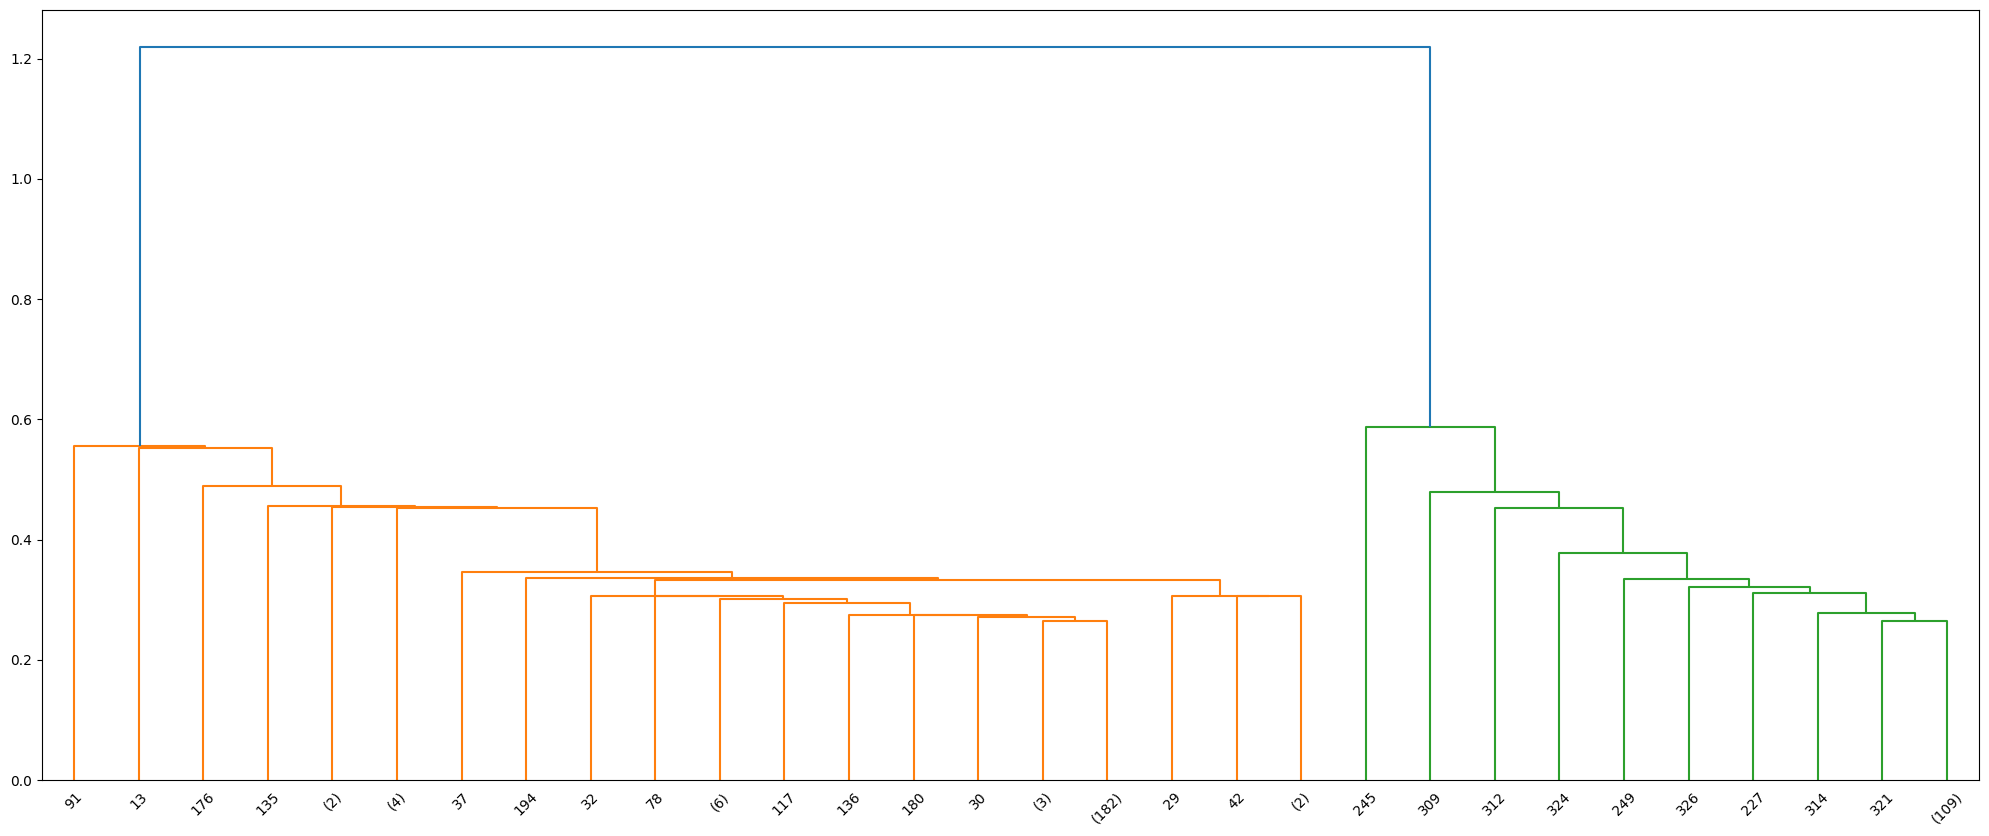

In [51]:
plot_dendrogram(pca_data, "single")

If we take a look at the scatterplot and understand how single linkage works, it's only natural for the dendrogram to look that way. Let's again see the other linkage methods:

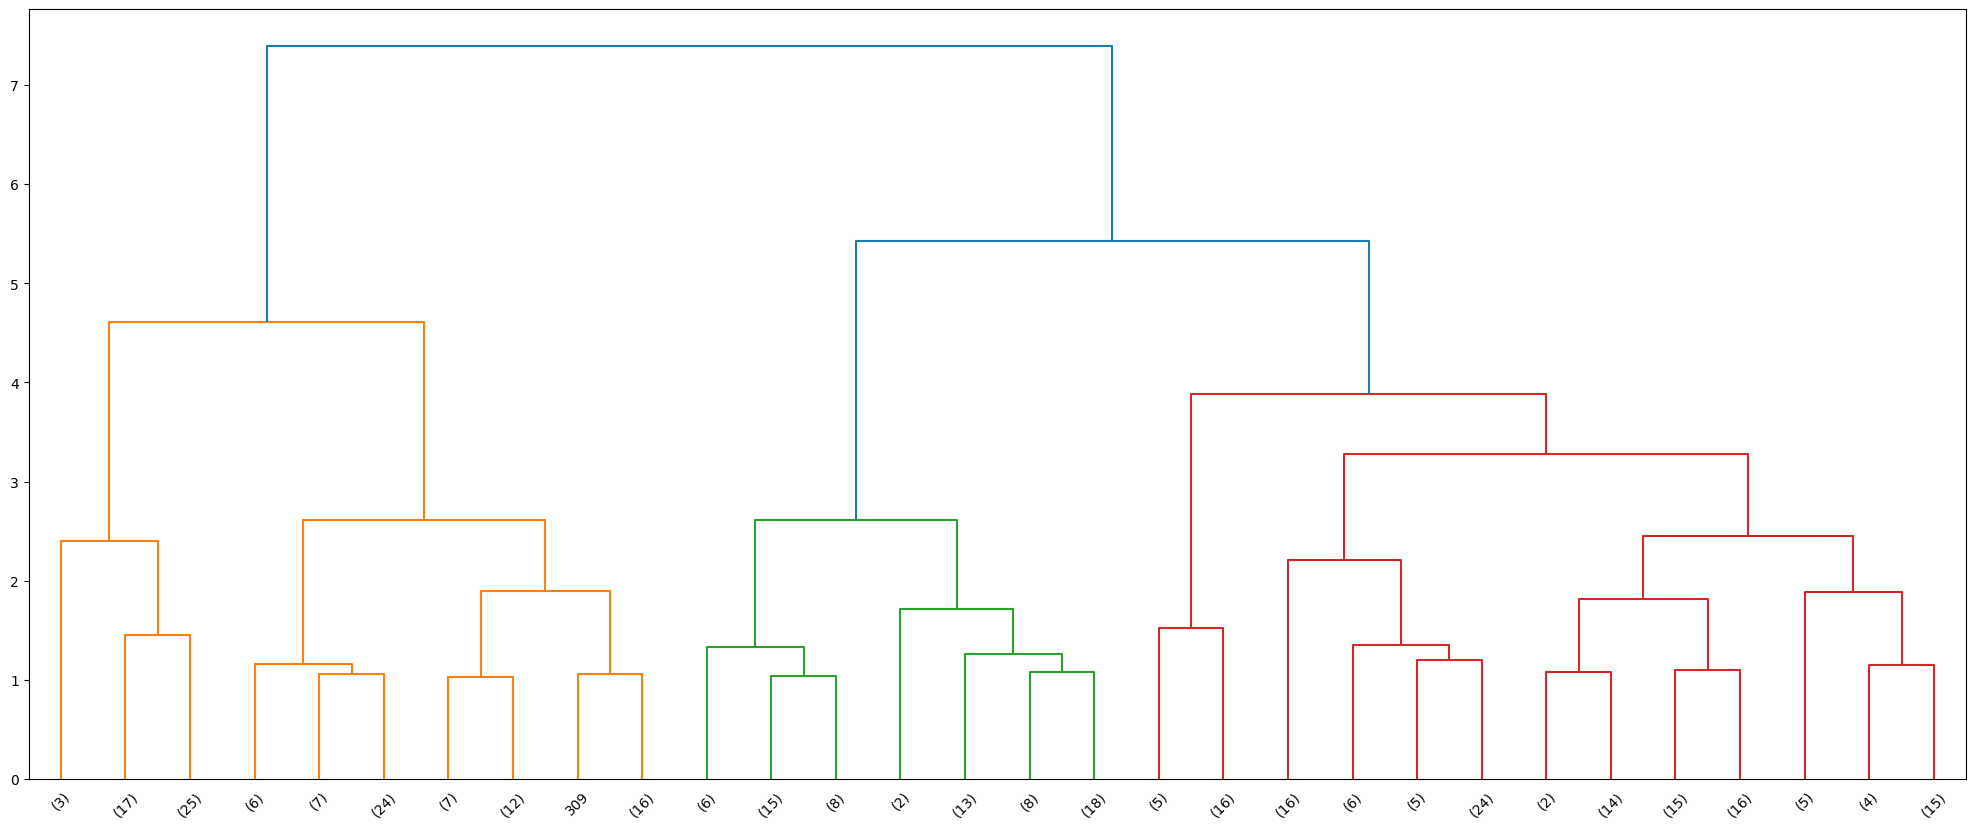

In [52]:
plot_dendrogram(pca_data, "complete")

Here it looks like the data is split into 4 "main" clusters.

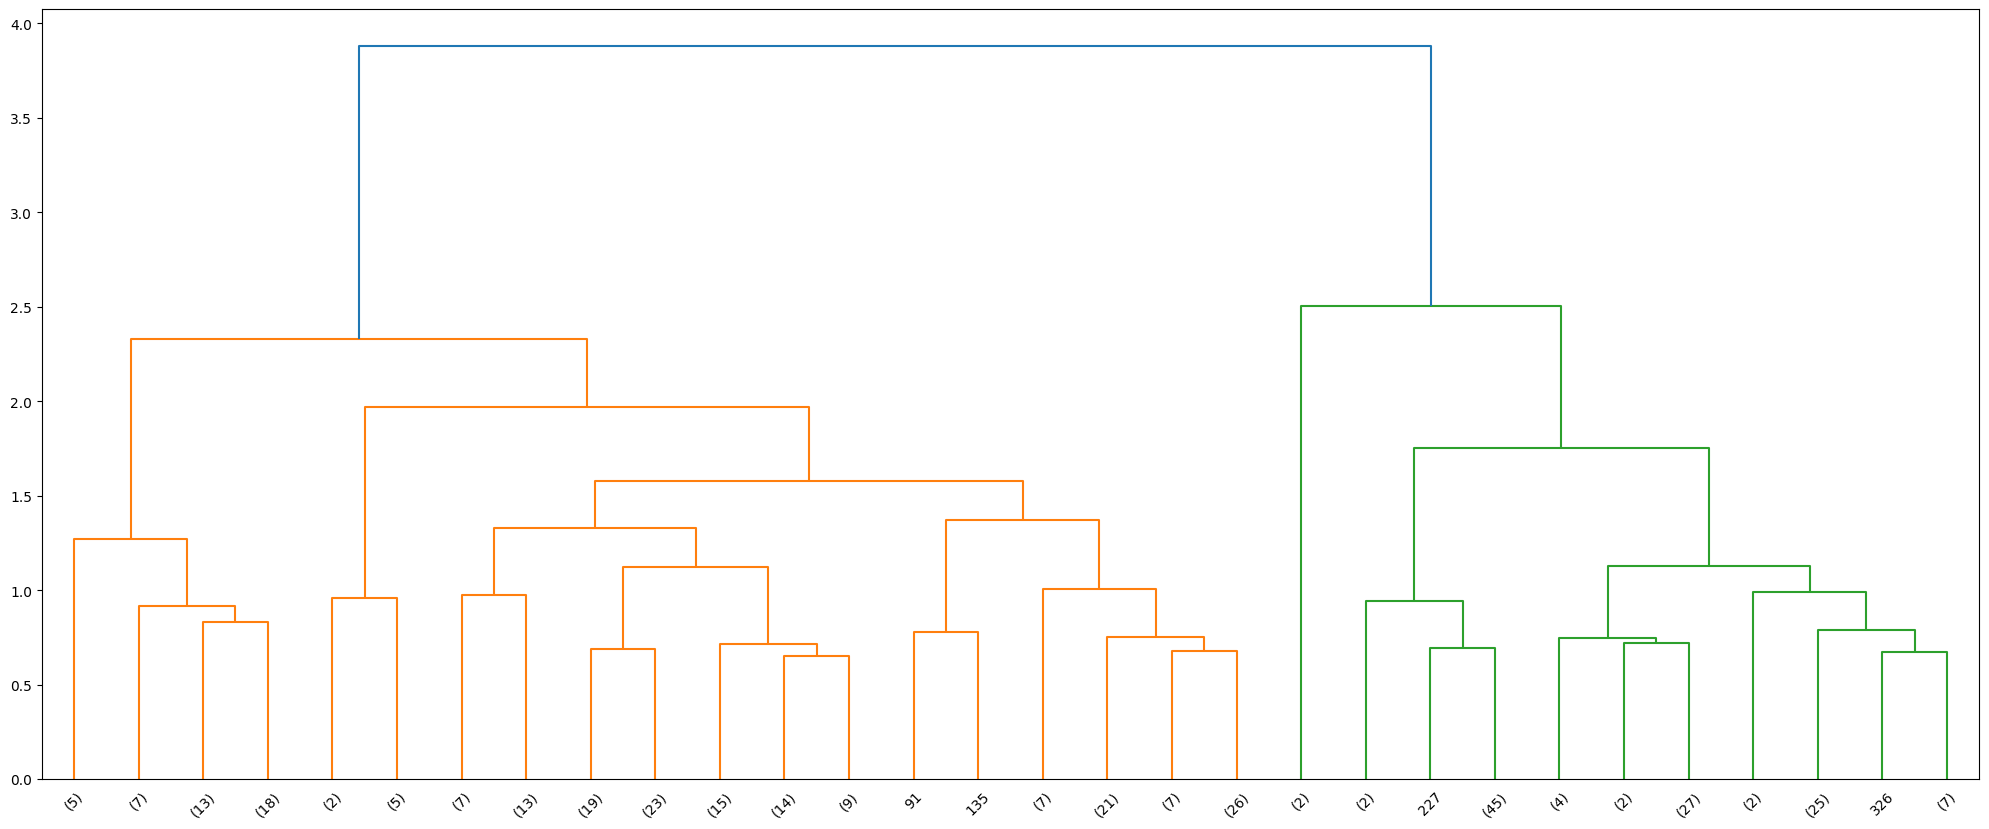

In [53]:
plot_dendrogram(pca_data, "average")

Here it looks more like there are 5 different species.

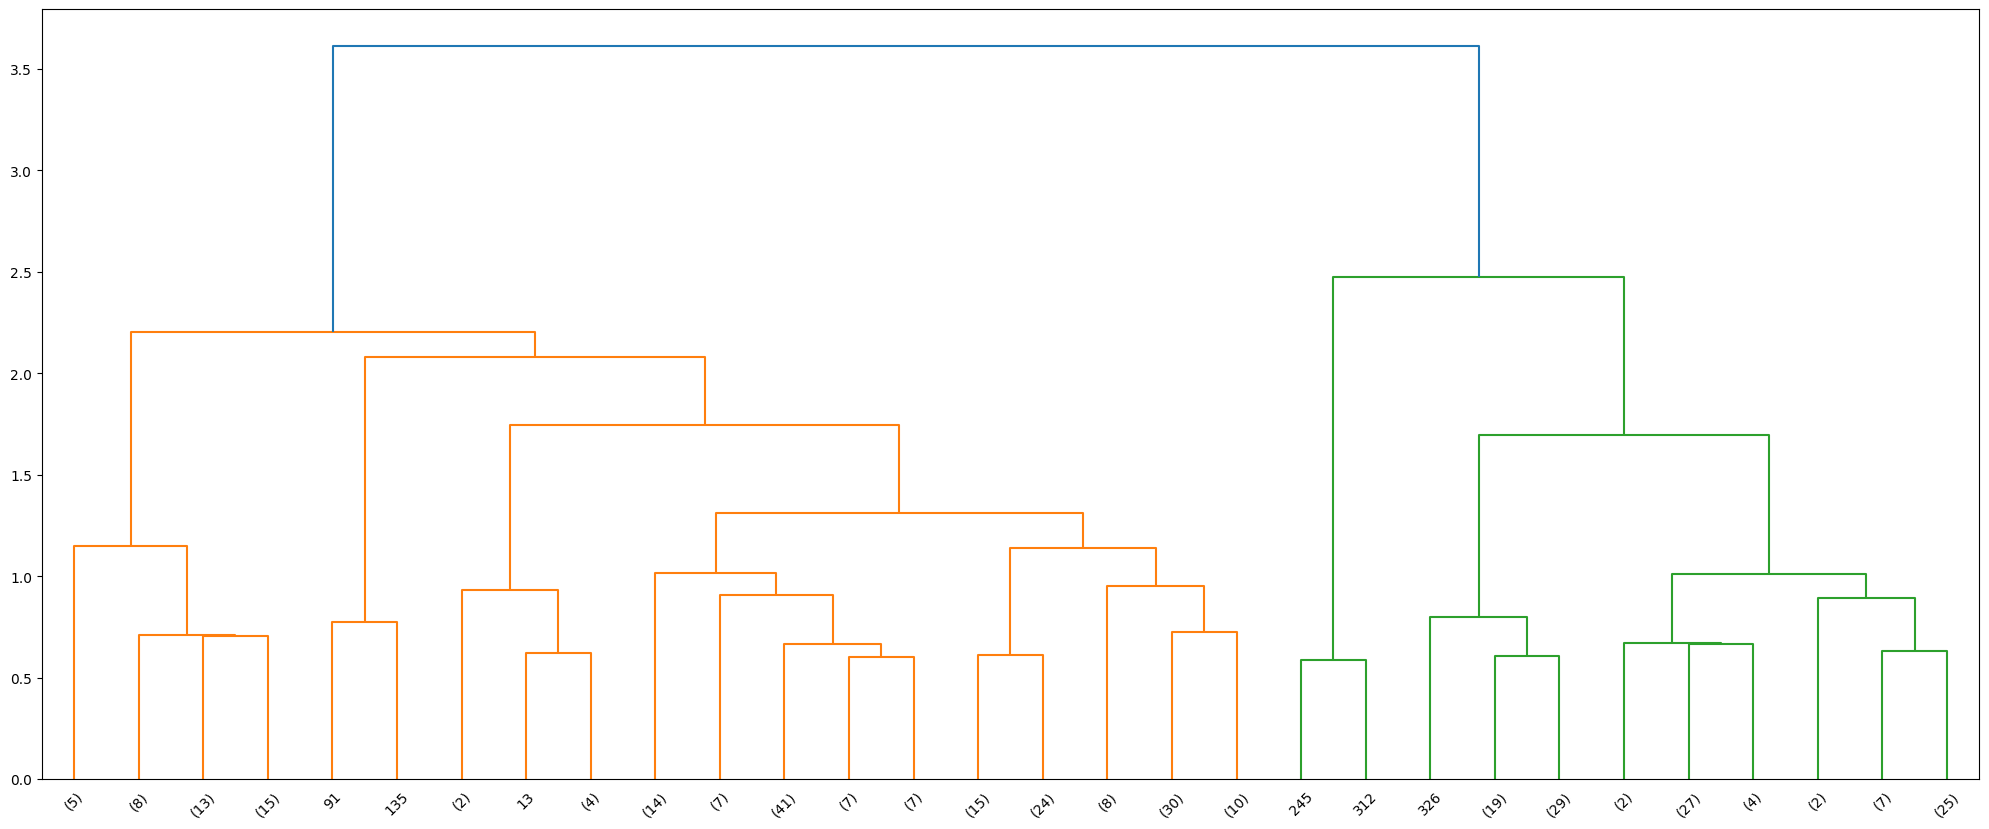

In [54]:
plot_dendrogram(pca_data, "centroid")

This also looks more like 5 distinct species. Now let's try to scale the PCA data to see if it gets different:

In [55]:
pca_scaler = StandardScaler()
pca_scaler.fit(pca_data)
pca_scaled_data = pca_scaler.transform(pca_data)

Let's see the inertias again:

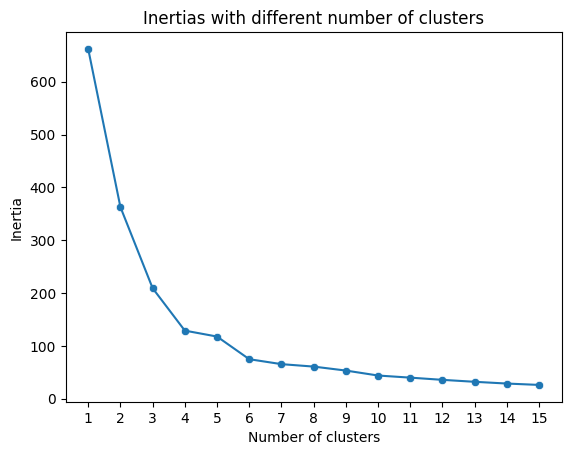

In [56]:
plot_inertias(pca_scaled_data, 15)

The inertia dropped even more. Also we can see a strange relationship between the 4,5 and 6 numbers. Here 6 looks just like the "elbow" we are looking for. Now for the dendrograms:

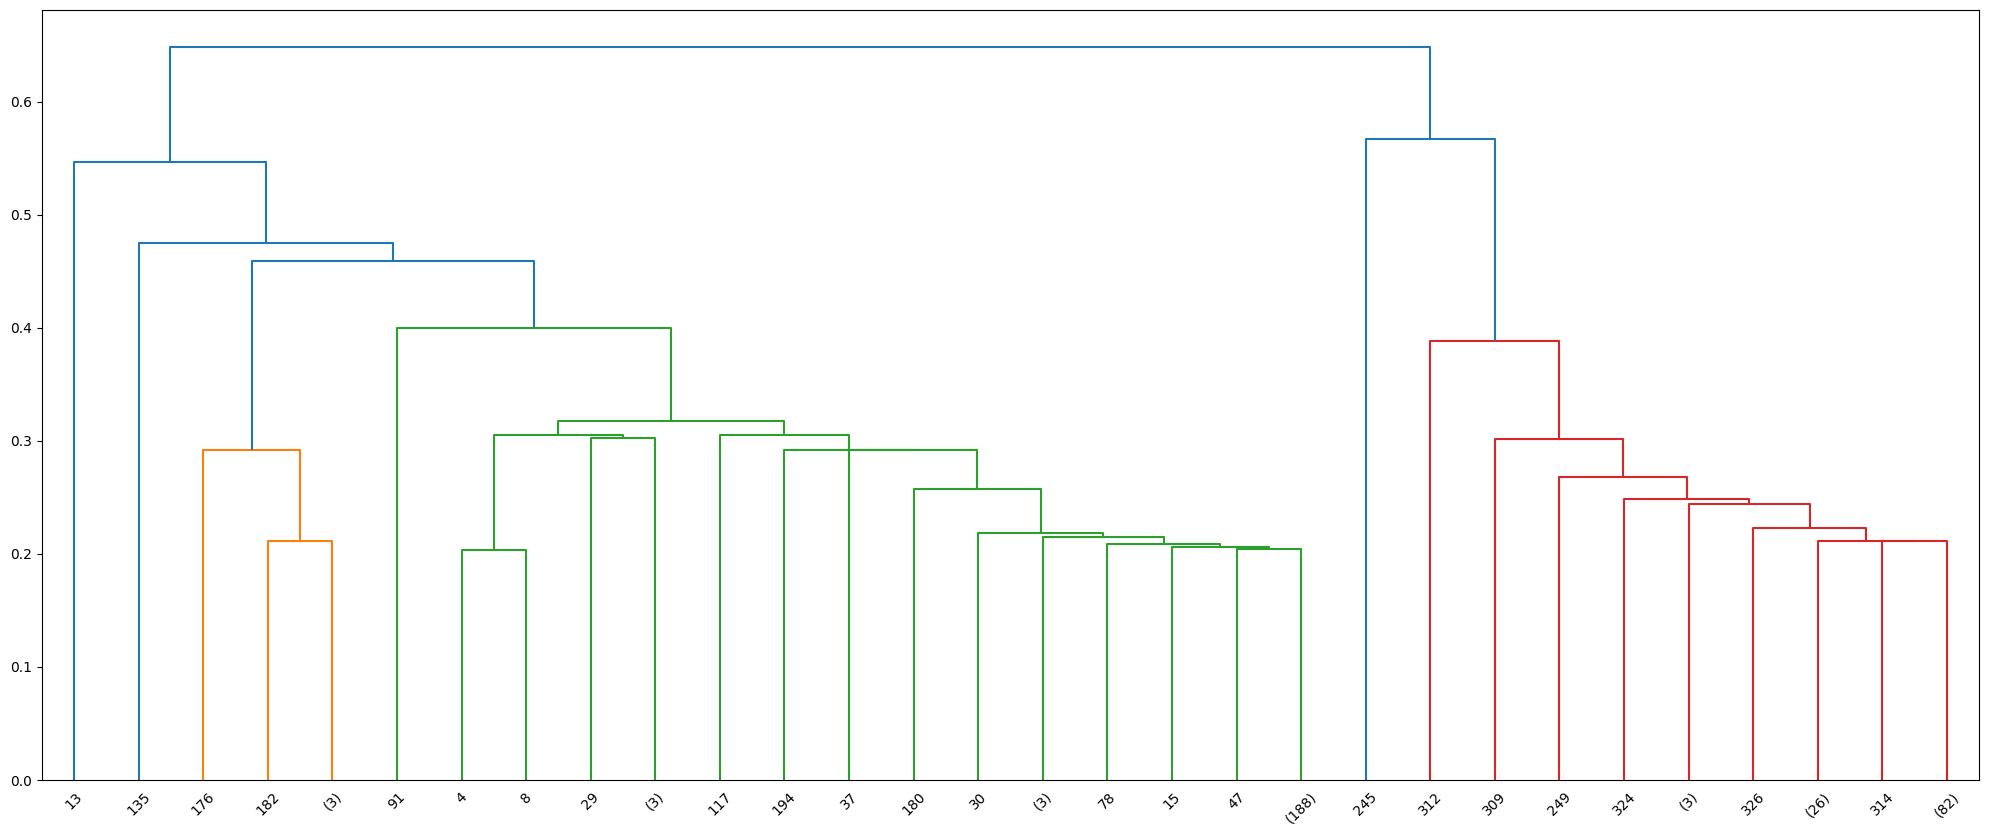

In [57]:
plot_dendrogram(pca_scaled_data, "single")

This is a bit hard to interpret, it resembles 6 species, but not very confidently.

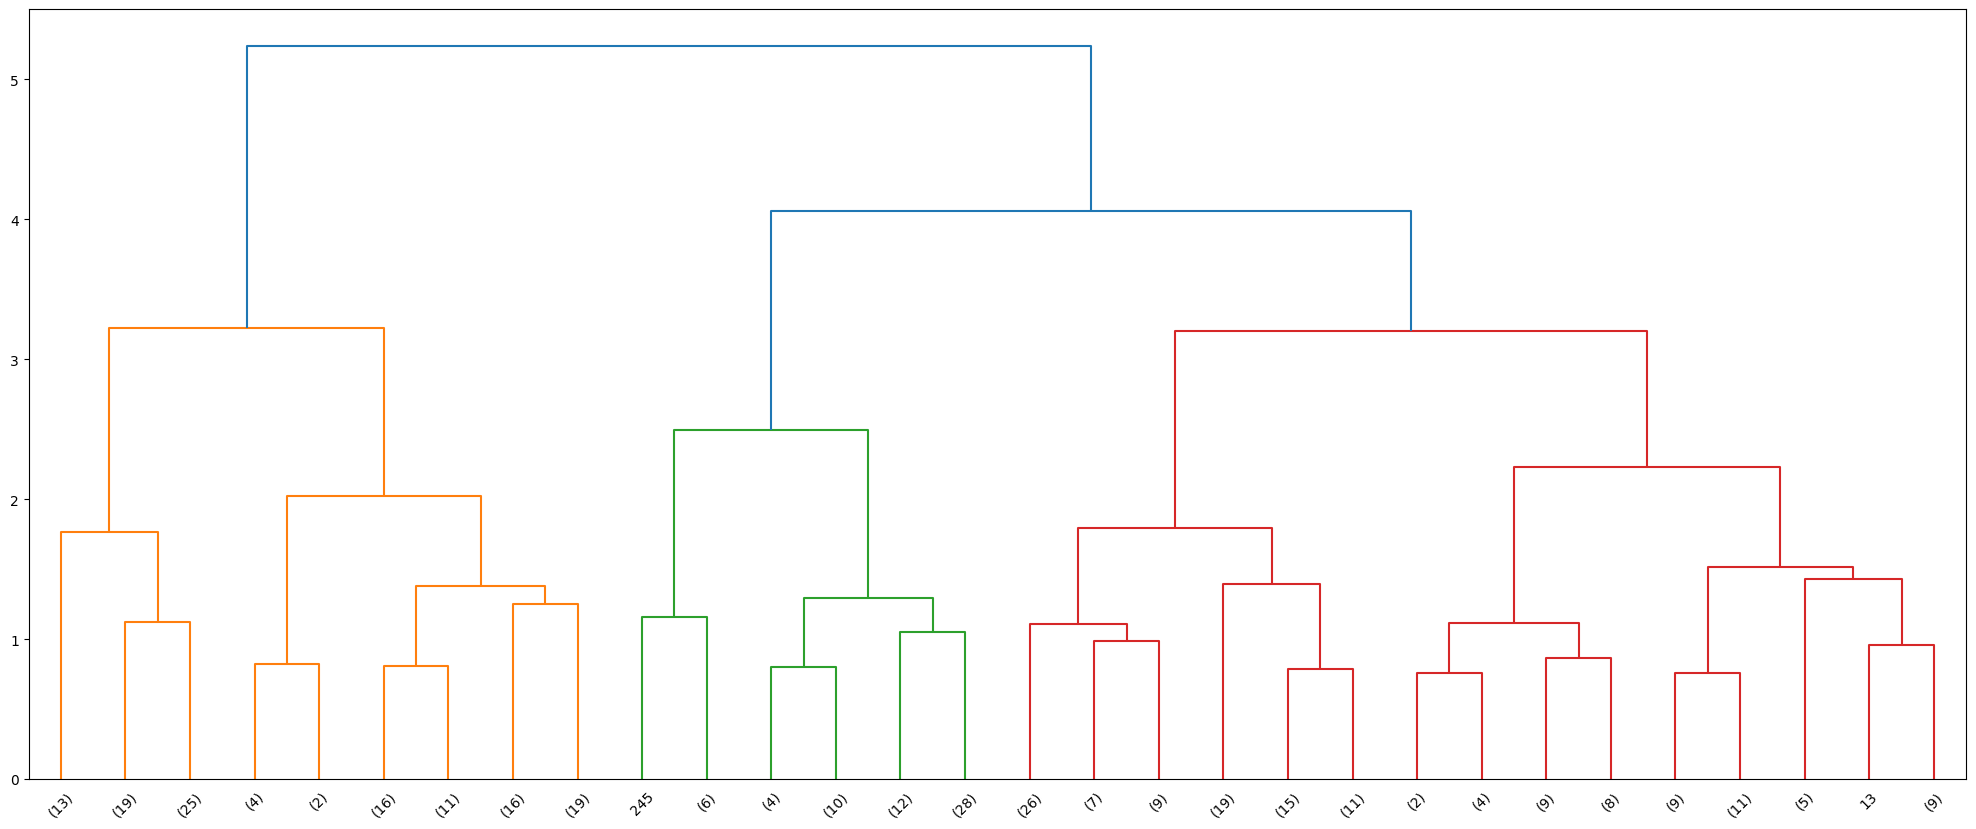

In [58]:
plot_dendrogram(pca_scaled_data, "complete")

Here we can see 5 distinct clusters.

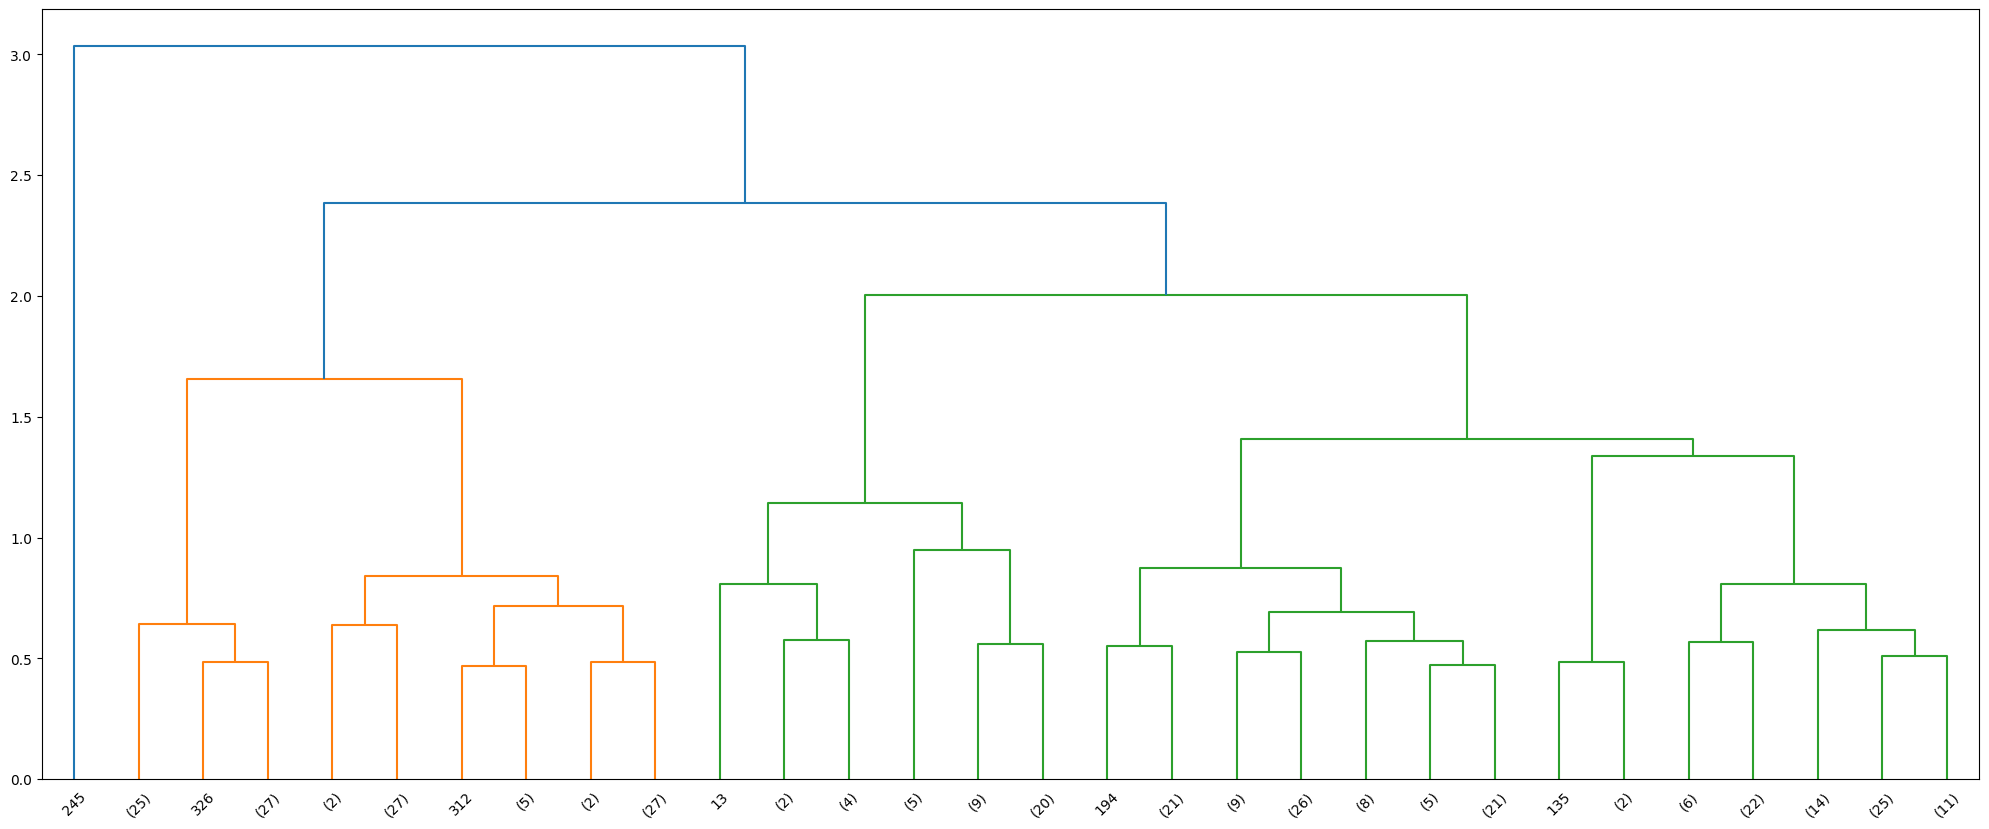

In [59]:
plot_dendrogram(pca_scaled_data, "average")

Here it looks more like there are 5 clusters with an outliar again.

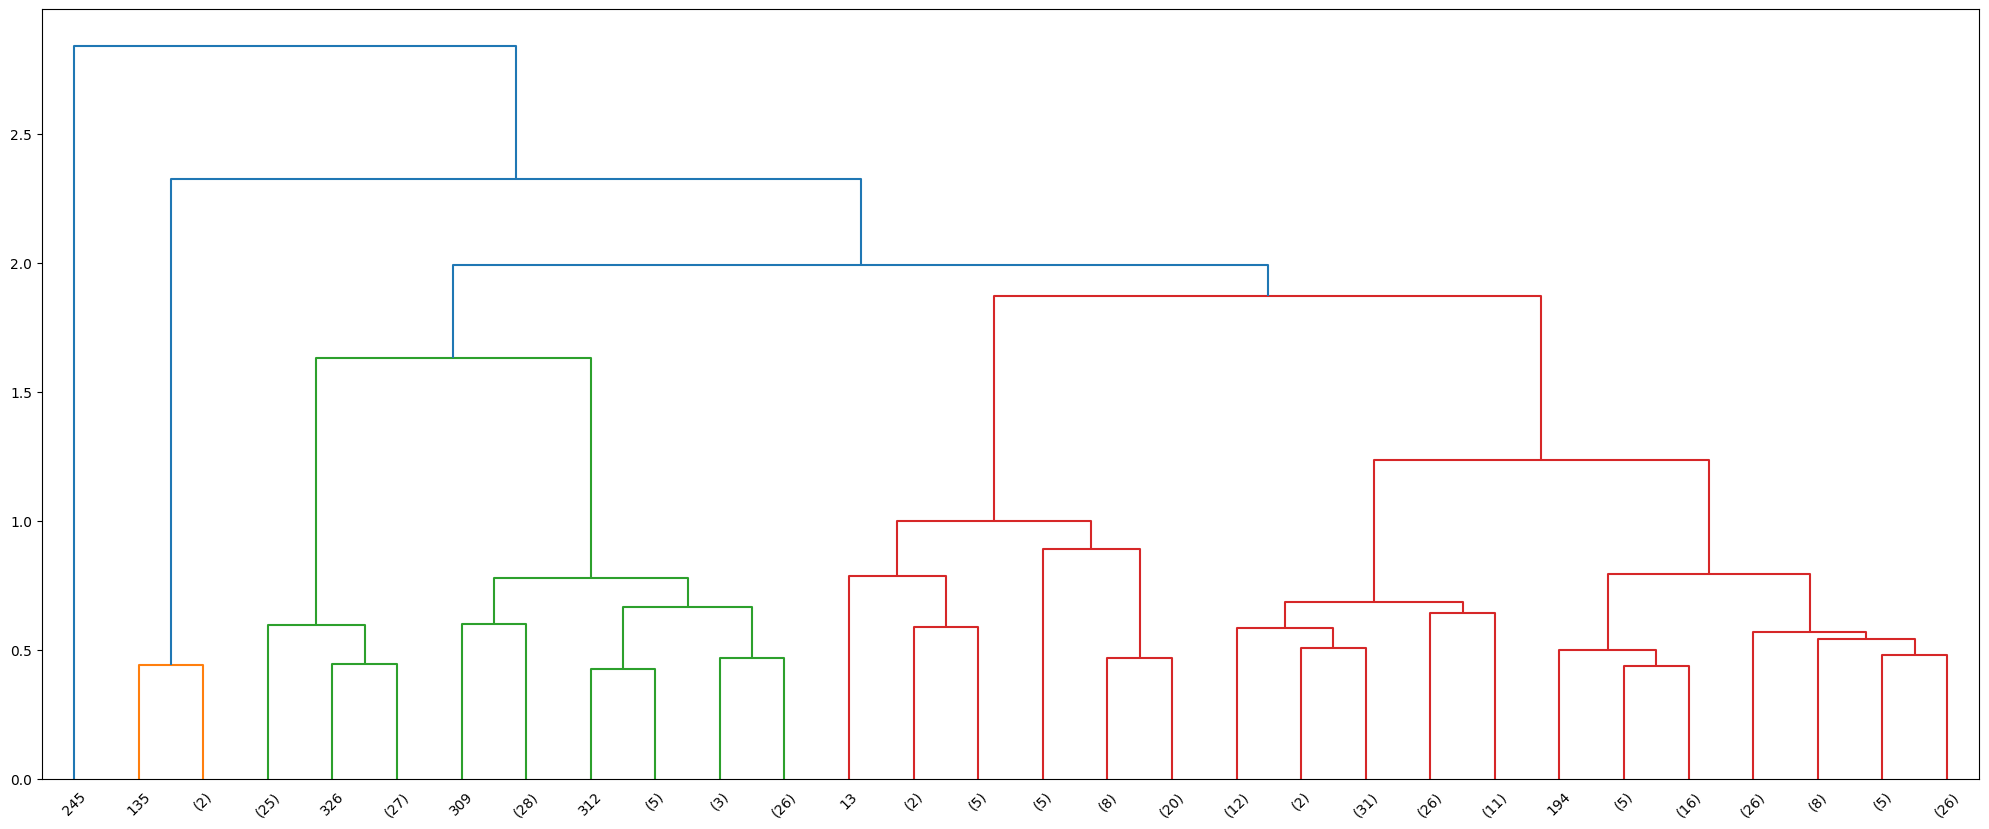

In [60]:
plot_dendrogram(pca_scaled_data, "centroid")

Here, we can see the same thing as with the previous one.

Now let's try another dimensionality reduction method - NMF:

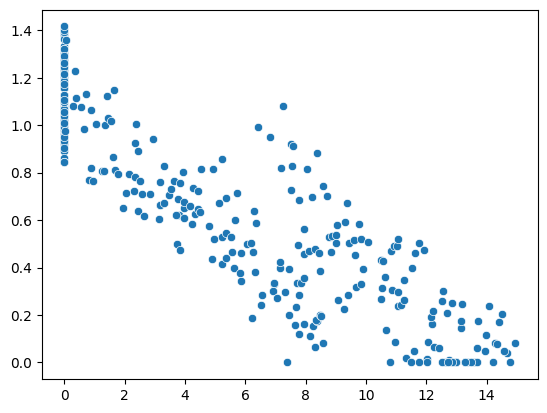

In [61]:
nmf = NMF(n_components=2, max_iter=200000)
nmf.fit(data)
nmf_data = nmf.transform(data)

sns.scatterplot(x=nmf_data[:,0], y=nmf_data[:,1])
plt.show()

That doesn't look clustered at all. Maybe NMF is not the way to go here.

Now it's time to test some models. Because T-SNE gives us the best visualization for the clusters in 2 dimensions, we can use the T-SNE points we got earlier in order to visualize the performance of our clustering algorithms.

In [62]:
def plot_clusters_tsne(model, data, ax=None):
    model.fit(data)
    if ax is not None:
        sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=model.labels_, palette="tab10", legend=False, ax=ax)
    else:
        sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=model.labels_, palette="tab10", legend=False)

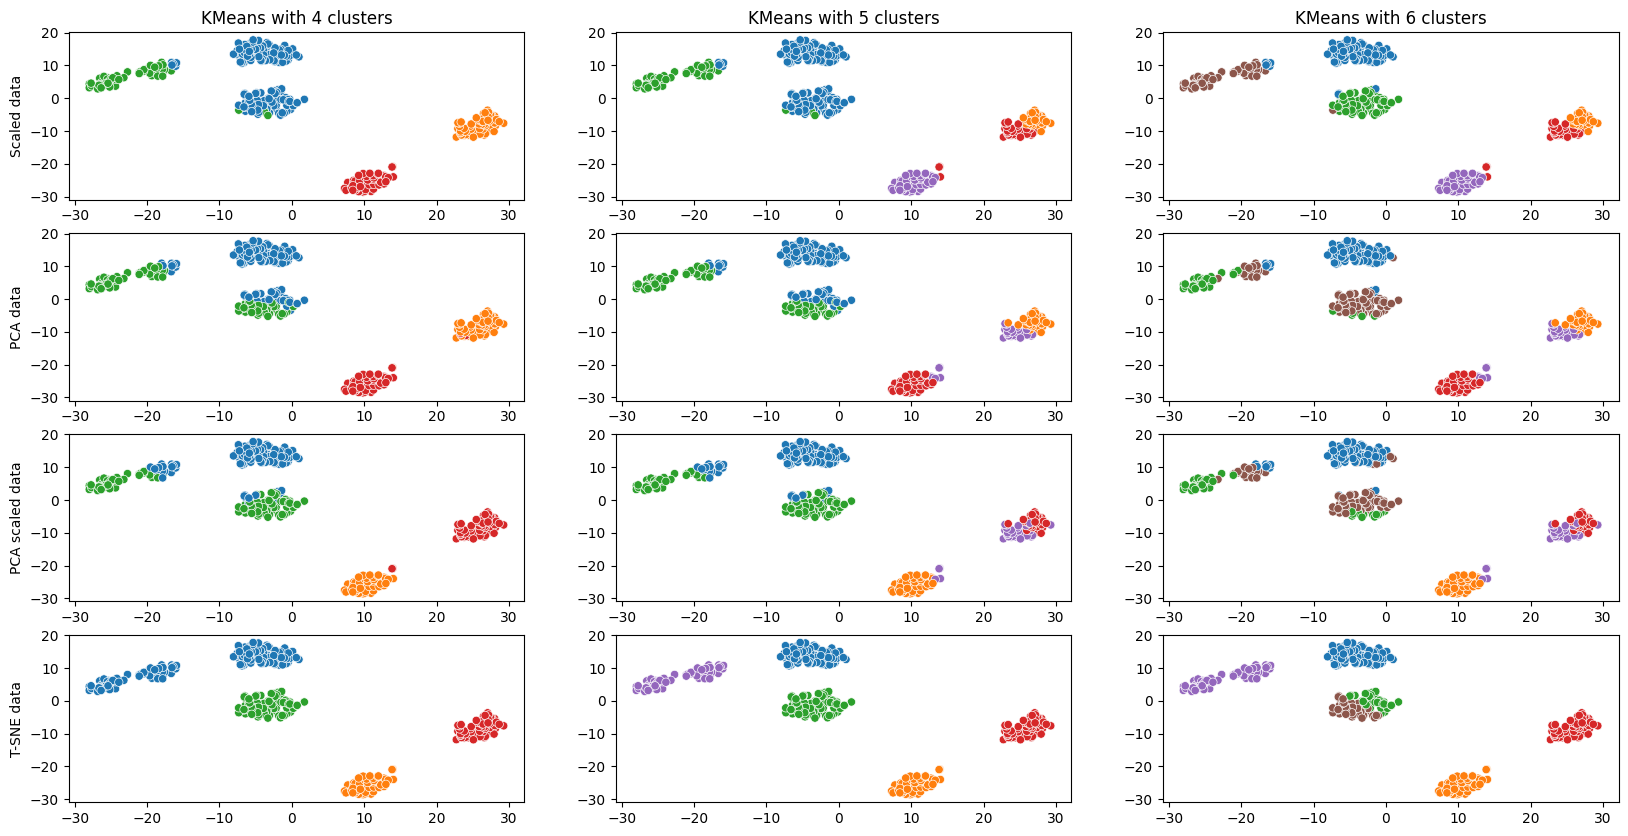

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))

clusters = [4, 5, 6]
datasets = [scaled_data, pca_data, pca_scaled_data, tsne_data]

for i in range(len(datasets)):
    for j in range(len(clusters)):
        plot_clusters_tsne(KMeans(n_clusters=clusters[j], random_state=42), datasets[i], axes[i,j])
        axes[0,j].set_title(f"KMeans with {clusters[j]} clusters")

axes[0,0].set_ylabel("Scaled data")
axes[1,0].set_ylabel("PCA data")
axes[2,0].set_ylabel("PCA scaled data")
axes[3,0].set_ylabel("T-SNE data")

plt.show()

When it comes to KMeans, the best performing model is the one with the T-SNE transformed data, although the result for the 6 clusters does not look as desired.

Now let's do the same with DBSCAN. But for the DBSCAN, we would have to choose the "eps" parameter for each dataset separately.

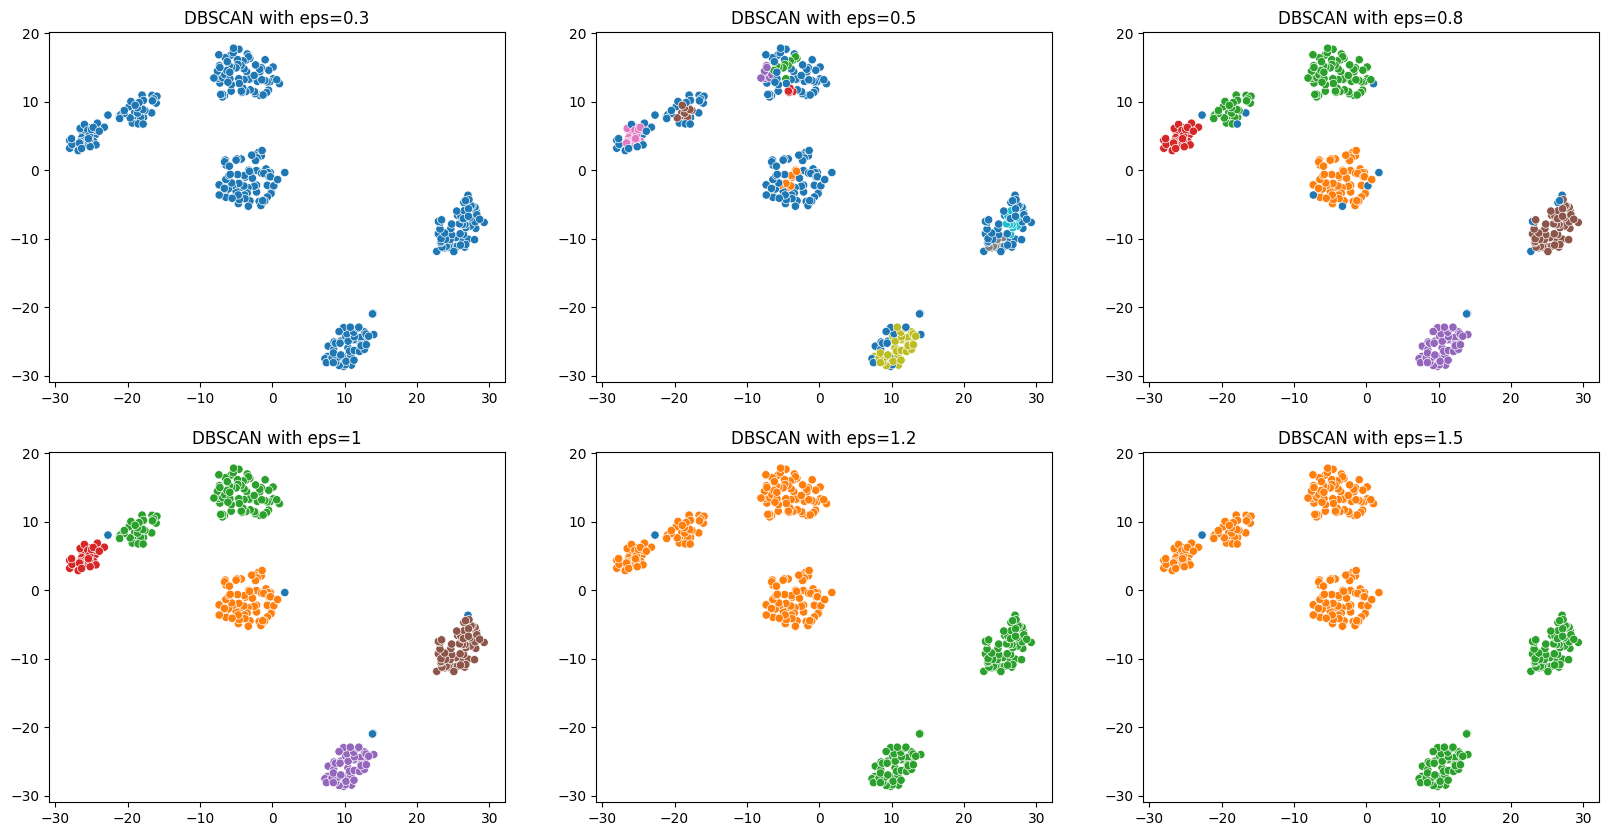

In [64]:
def plot_grid_search_dbscan(dataset, eps_values):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
    axes = axes.flatten()
    
    
    for i in range(len(eps_values)):
        plot_clusters_tsne(DBSCAN(eps=eps_values[i]), dataset, ax=axes[i])
        axes[i].set_title(f"DBSCAN with eps={eps_values[i]}")
        
    plt.show()

eps_values = [0.3, 0.5, 0.8, 1, 1.2, 1.5]

plot_grid_search_dbscan(scaled_data, eps_values)

We can see, that with just scaled data, it does well with eps=1. It finds 6 clusters, although one of them is kind of strange. Now let's try it with the other data forms we've got:

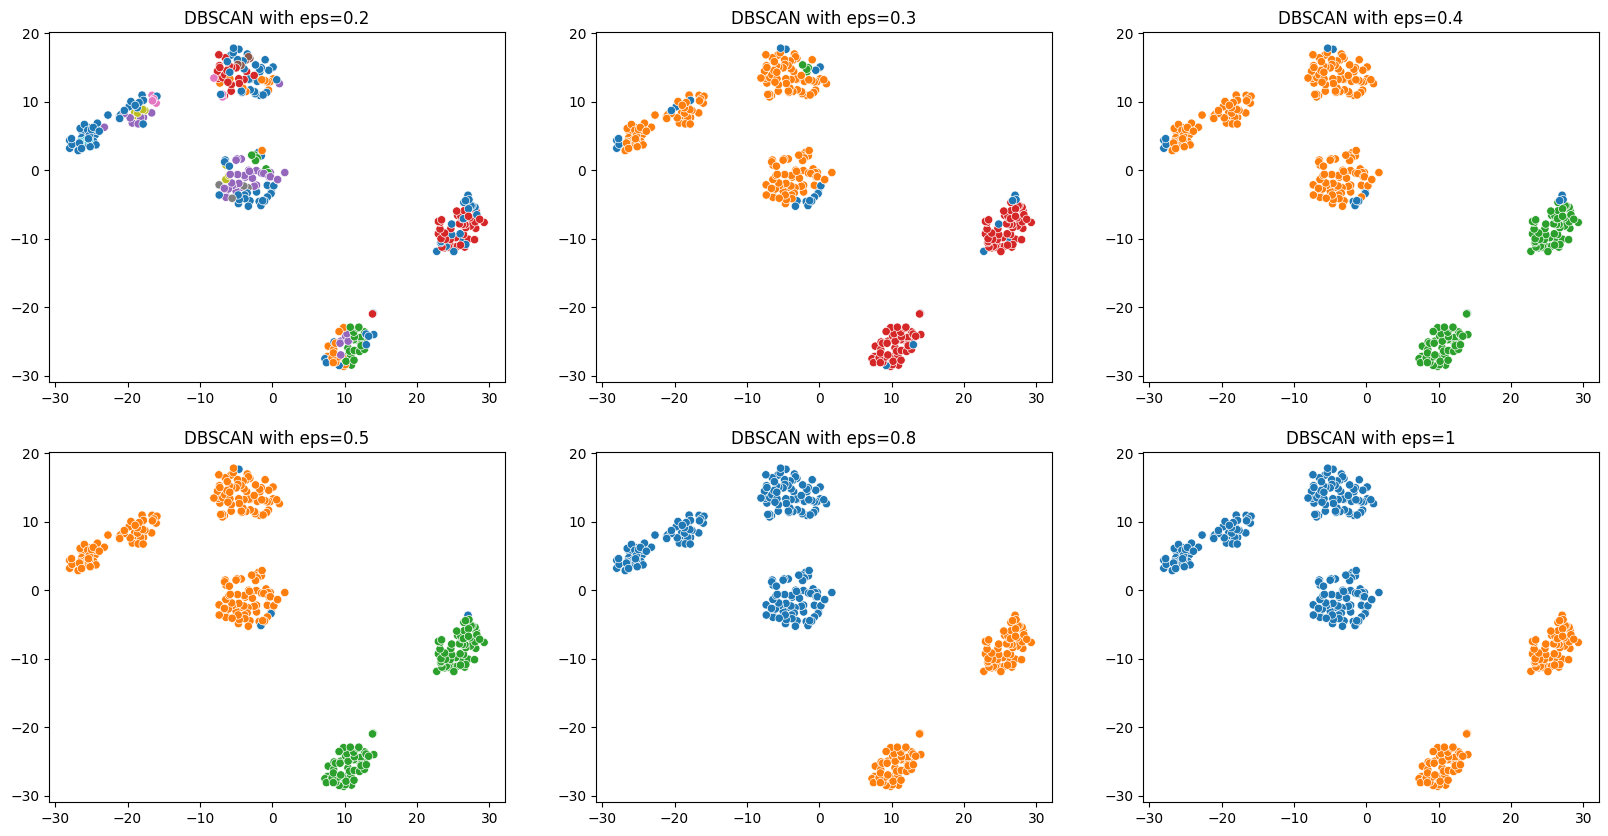

In [65]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.8, 1]

plot_grid_search_dbscan(pca_data, eps_values)

Here it does not perform well at all.

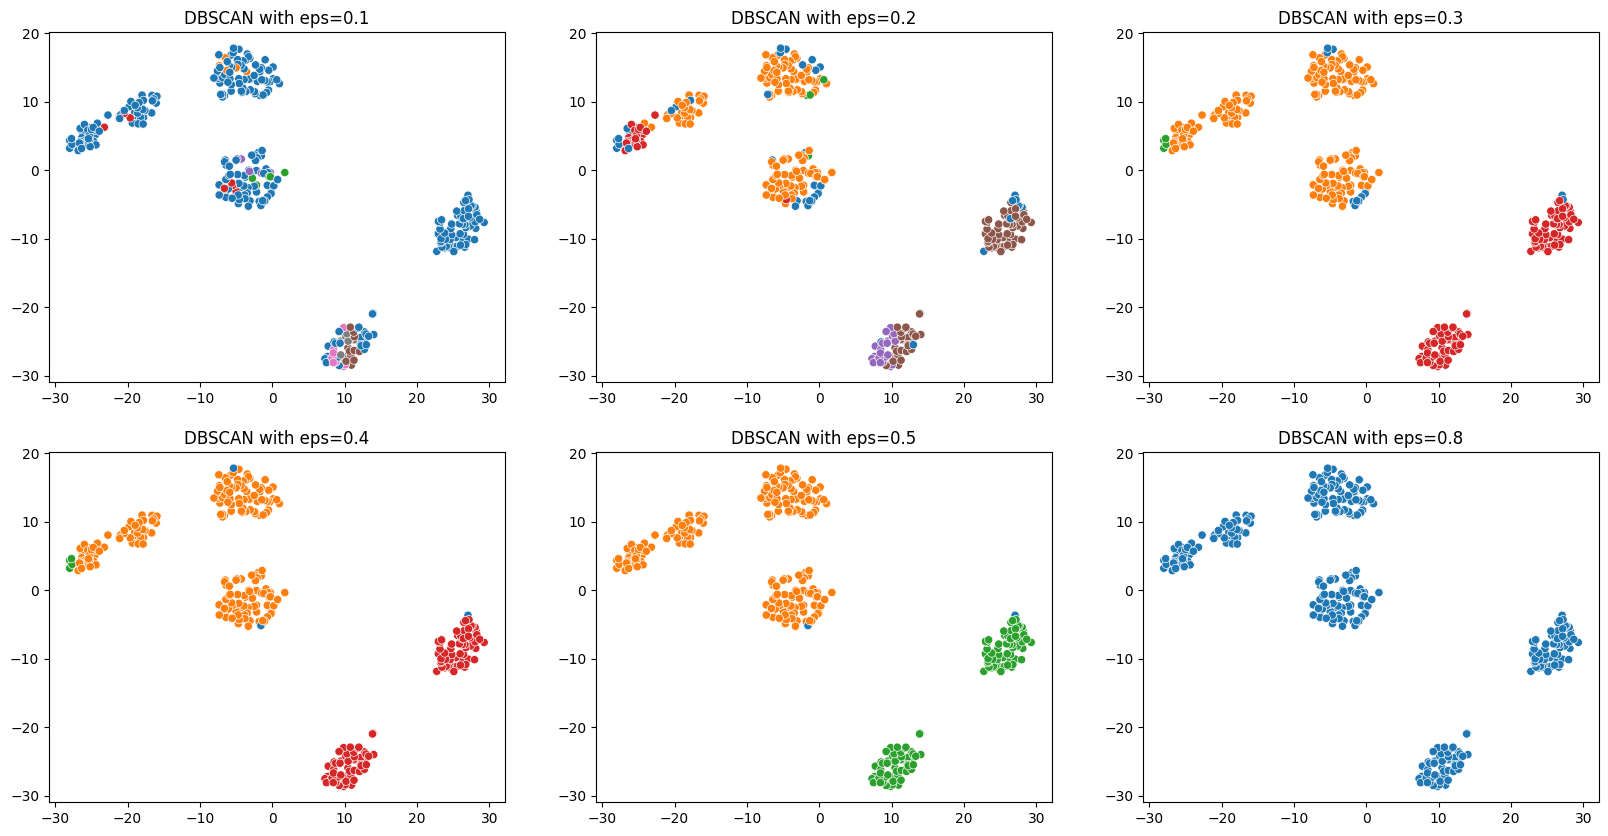

In [66]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8]

plot_grid_search_dbscan(pca_scaled_data, eps_values)

Here it's even worse. Now let's try at last with the T-SNE data:

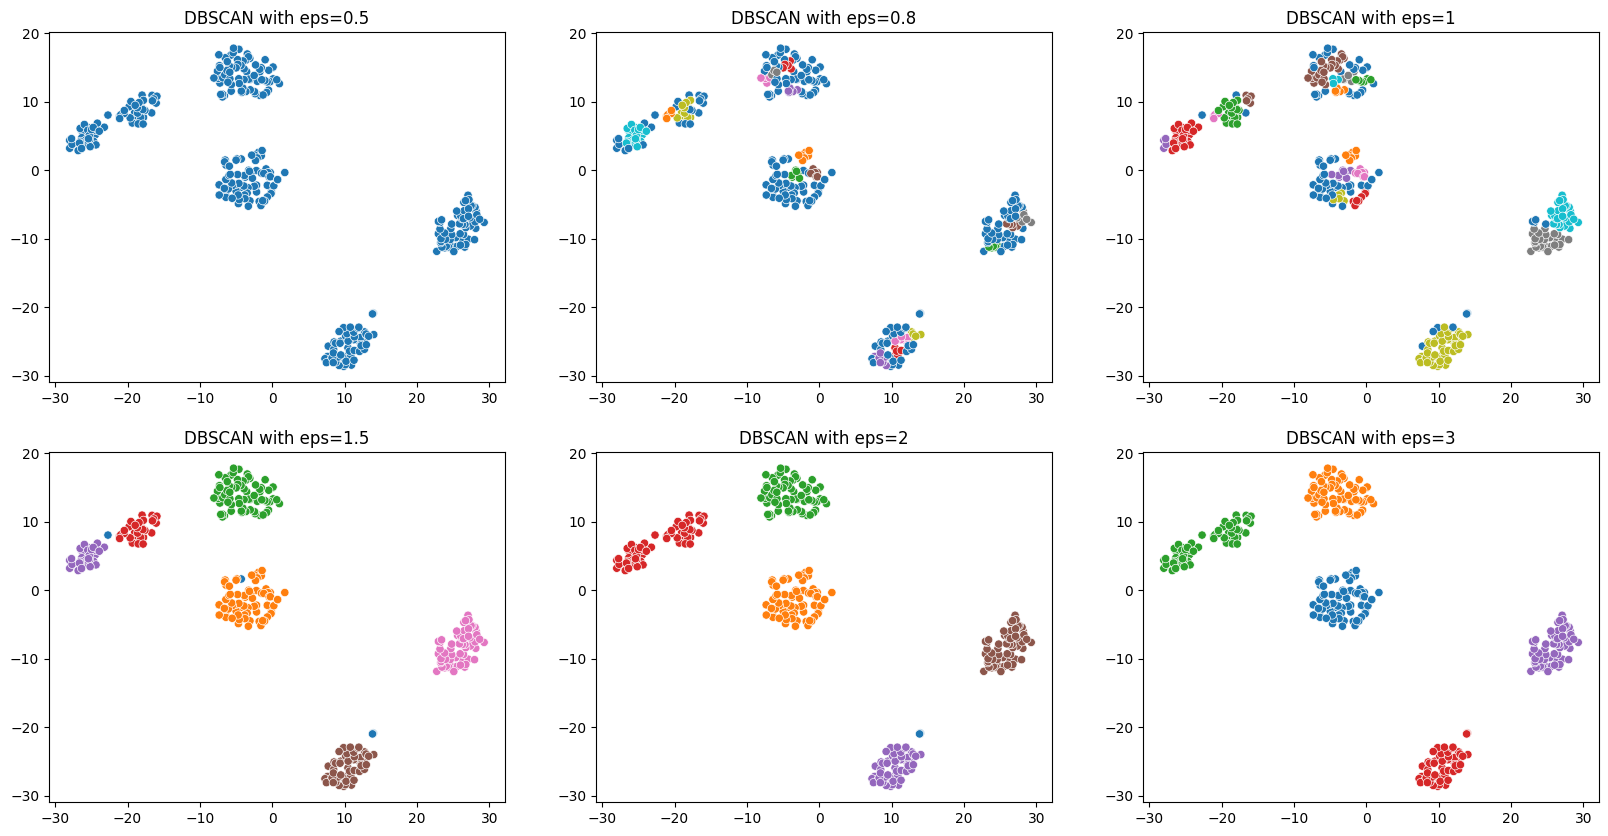

In [67]:
eps_values = [0.5, 0.8, 1, 1.5, 2, 3]

plot_grid_search_dbscan(tsne_data, eps_values)

Here it does best with eps=3 and it nails the clustering, choosing 5 clusters.

Now it's time to try HDBSCAN.

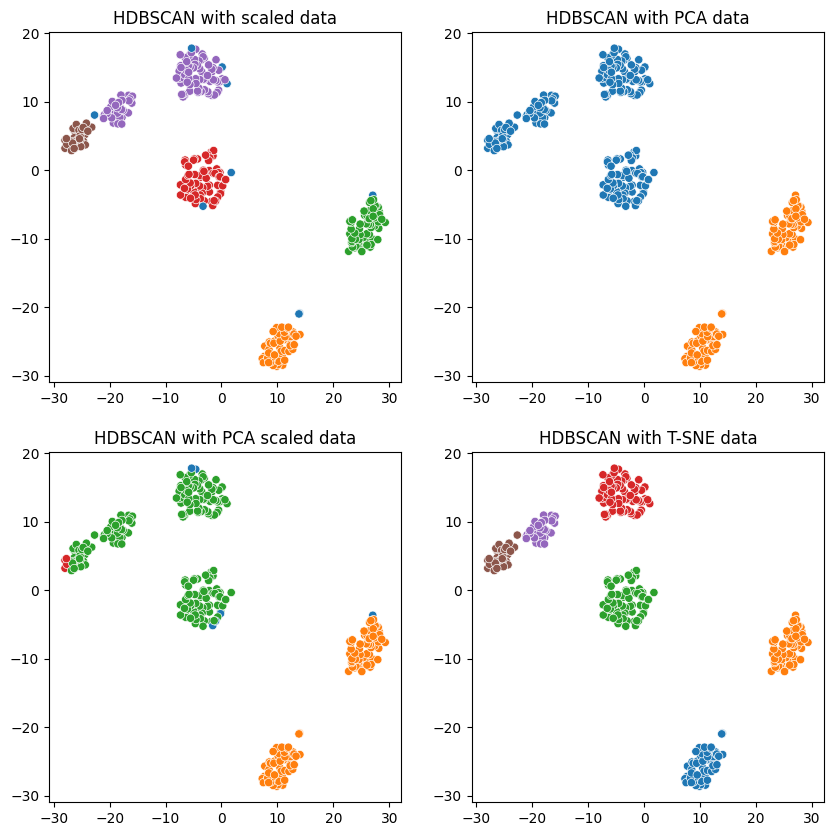

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(datasets)):
    plot_clusters_tsne(HDBSCAN(), datasets[i], axes[i])

axes[0].set_title("HDBSCAN with scaled data")
axes[1].set_title("HDBSCAN with PCA data")
axes[2].set_title("HDBSCAN with PCA scaled data")
axes[3].set_title("HDBSCAN with T-SNE data")


plt.show()

The one with the T-SNE data nails the 6 clusters separation, which is great.

Now it's time for the final model we are going to test, the Spectral clustering.

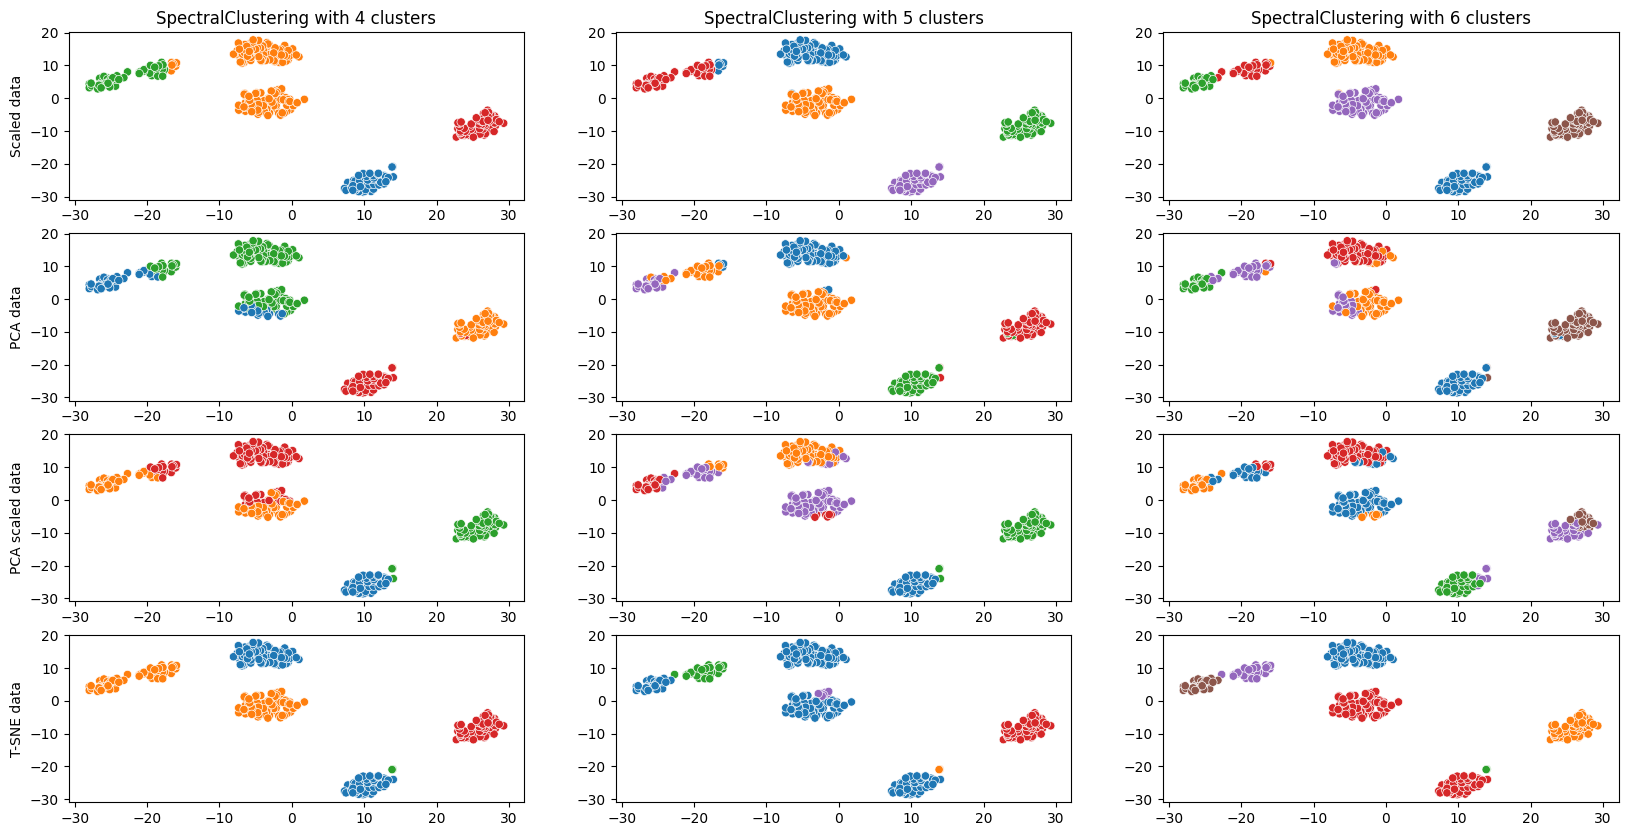

In [69]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))

clusters = [4, 5, 6]
datasets = [scaled_data, pca_data, pca_scaled_data, tsne_data]

for i in range(len(datasets)):
    for j in range(len(clusters)):
        plot_clusters_tsne(SpectralClustering(n_clusters=clusters[j], random_state=42), datasets[i], axes[i,j])
        axes[0,j].set_title(f"SpectralClustering with {clusters[j]} clusters")

axes[0,0].set_ylabel("Scaled data")
axes[1,0].set_ylabel("PCA data")
axes[2,0].set_ylabel("PCA scaled data")
axes[3,0].set_ylabel("T-SNE data")

plt.show()

Here, no model performs really outstandingly.

## **Conclusion**

In conclusion, there are most likely 5 penguin species in this dataset. The best model for clustering into 5 species is DBSCAN with eps=3 after T-SNE after using StandardScaler. T-SNE doesn't have a transform() method so instead we would have to create a custom transformer in order to put it in a pipeline.

In [70]:
class TSNETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, learning_rate=60, random_state=42):
        self.learning_rate = learning_rate
        self.random_state = random_state

    def fit(self, X):
        self._tsne = TSNE(
            learning_rate = self.learning_rate,
            random_state = self.random_state
        )
        self.transformed_data = self._tsne.fit_transform(X)
        return self

    def transform(self, X):
        return self.transformed_data

Here is the pipeline for the best model to cluster the penguins into 5 species:

In [71]:
five_species_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("tsne", TSNETransformer()),
        ("dbscan", DBSCAN(eps=3))
])

If after more research it's concluded, that there are 6 species, this is the pipeline for the best clustering:

In [72]:
six_species_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("tsne", TSNETransformer()),
        ("hdbscan", HDBSCAN())
])